## **Importing Modules**

In [5]:
# # Install modules

# install.packages('lubridate')
# install.packages('zoo')
# install.packages('ggplot2')
# install.packages('reshape2')
# install.packages("glmnet")
# install.packages("randomForest")
# install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
# Import modules

options(warn = -1)
library(lubridate)
library(dplyr)
library(stringr)
library(zoo)
library(ggplot2)
library('reshape2')
library('glmnet')
library(randomForest)
library(reshape2)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: Matrix

Loaded glmnet 4.1-4

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




## **Data Preprocessing**

In [7]:
# reading files from GITHUB having dependent and independent variables
df1<-read.csv('https://raw.githubusercontent.com/DN612/Crypto-Analysis/main/Data%20Sources/Data_Macro.csv',header = TRUE)
df2<-read.csv('https://raw.githubusercontent.com/DN612/Crypto-Analysis/main/Data%20Sources/Data_Macro2.csv',header = TRUE)
df1 <-df1[2:nrow(df1),]
head(df1)

,X.NAME.,DIA.US.Index,CNYUSD.Curncy,EURUSD.Curncy,GBTC.US.Equity,ETHE.US.Equity,LTCN.US.Equity,CCRIXRP.Index,Lumber.prices,WTI.Oil
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,01/01/2015,177.88,0.16109,1.2104,#N/A,#N/A,#N/A,#N/A,328.2,53.27
3,02/01/2015,177.94,0.16112,1.2002,#N/A,#N/A,#N/A,#N/A,327.6,52.69
4,05/01/2015,174.84,0.16072,1.1933,#N/A,#N/A,#N/A,#N/A,325.6,50.04
5,06/01/2015,173.39,0.16088,1.189,#N/A,#N/A,#N/A,#N/A,317.4,47.93
6,07/01/2015,175.59,0.16099,1.1839,#N/A,#N/A,#N/A,#N/A,322.7,48.65
7,08/01/2015,178.76,0.16099,1.1793,#N/A,#N/A,#N/A,#N/A,320.2,48.79


In [8]:
df2 <-df2[2:nrow(df2),]
head(df2)

,X.NAME.,GDX.US.Equity,VIX.Index,VVIX.Index,SHCOMP.Index,TWSE.Index,SPX.Index
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,01/01/2015,18.38,19.2,113.08,3234.678,9307.26,2058.9
3,02/01/2015,18.94,17.79,112.55,3234.678,9307.26,2058.2
4,05/01/2015,19.44,19.92,121.87,3350.519,9274.11,2020.58
5,06/01/2015,20.47,21.12,118.45,3351.446,9048.34,2002.61
6,07/01/2015,20.09,19.31,107.69,3373.954,9080.09,2025.9
7,08/01/2015,19.79,17.01,98.44,3293.456,9238.03,2062.14


In [9]:
# Data type of the dataframe
typeof(df1$X.NAME.)

[1] "character"

In [10]:
# converting to date time
df1$X.NAME.<-as.Date(df1$X.NAME., format =  "%d/%m/%Y")
df2$X.NAME.<-as.Date(df2$X.NAME., format =  "%d/%m/%Y")

In [11]:
# merging the dataframes
df <- merge(df1, df2, by="X.NAME.")
head(df)

,X.NAME.,DIA.US.Index,CNYUSD.Curncy,EURUSD.Curncy,GBTC.US.Equity,ETHE.US.Equity,LTCN.US.Equity,CCRIXRP.Index,Lumber.prices,WTI.Oil,GDX.US.Equity,VIX.Index,VVIX.Index,SHCOMP.Index,TWSE.Index,SPX.Index
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2015-01-01,177.88,0.16109,1.2104,#N/A,#N/A,#N/A,#N/A,328.2,53.27,18.38,19.2,113.08,3234.678,9307.26,2058.9
2,2015-01-02,177.94,0.16112,1.2002,#N/A,#N/A,#N/A,#N/A,327.6,52.69,18.94,17.79,112.55,3234.678,9307.26,2058.2
3,2015-01-05,174.84,0.16072,1.1933,#N/A,#N/A,#N/A,#N/A,325.6,50.04,19.44,19.92,121.87,3350.519,9274.11,2020.58
4,2015-01-06,173.39,0.16088,1.189,#N/A,#N/A,#N/A,#N/A,317.4,47.93,20.47,21.12,118.45,3351.446,9048.34,2002.61
5,2015-01-07,175.59,0.16099,1.1839,#N/A,#N/A,#N/A,#N/A,322.7,48.65,20.09,19.31,107.69,3373.954,9080.09,2025.9
6,2015-01-08,178.76,0.16099,1.1793,#N/A,#N/A,#N/A,#N/A,320.2,48.79,19.79,17.01,98.44,3293.456,9238.03,2062.14


In [12]:
print(paste('Columns of the entire dataframe',ncol(df)))
print(paste('Columns of the first dataframe',ncol(df1)))
print(paste('Columns of the second dataframe',ncol(df2)))

[1] "Columns of the entire dataframe 16"
[1] "Columns of the first dataframe 10"
[1] "Columns of the second dataframe 7"


In [13]:
# Setting index as Date
names(df)[1] <- 'Date'
print(nrow(df))
print(ncol(df))
head(df)

[1] 1827
[1] 16


,Date,DIA.US.Index,CNYUSD.Curncy,EURUSD.Curncy,GBTC.US.Equity,ETHE.US.Equity,LTCN.US.Equity,CCRIXRP.Index,Lumber.prices,WTI.Oil,GDX.US.Equity,VIX.Index,VVIX.Index,SHCOMP.Index,TWSE.Index,SPX.Index
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2015-01-01,177.88,0.16109,1.2104,#N/A,#N/A,#N/A,#N/A,328.2,53.27,18.38,19.2,113.08,3234.678,9307.26,2058.9
2,2015-01-02,177.94,0.16112,1.2002,#N/A,#N/A,#N/A,#N/A,327.6,52.69,18.94,17.79,112.55,3234.678,9307.26,2058.2
3,2015-01-05,174.84,0.16072,1.1933,#N/A,#N/A,#N/A,#N/A,325.6,50.04,19.44,19.92,121.87,3350.519,9274.11,2020.58
4,2015-01-06,173.39,0.16088,1.189,#N/A,#N/A,#N/A,#N/A,317.4,47.93,20.47,21.12,118.45,3351.446,9048.34,2002.61
5,2015-01-07,175.59,0.16099,1.1839,#N/A,#N/A,#N/A,#N/A,322.7,48.65,20.09,19.31,107.69,3373.954,9080.09,2025.9
6,2015-01-08,178.76,0.16099,1.1793,#N/A,#N/A,#N/A,#N/A,320.2,48.79,19.79,17.01,98.44,3293.456,9238.03,2062.14


In [14]:
# ADS index
ads_index<-read.csv('https://raw.githubusercontent.com/DN612/Crypto-Analysis/main/Data%20Sources/ADS_Index.csv',header = TRUE)
head(ads_index)

,X,ADS_Index
,<chr>,<dbl>
1,1960:03:01,-0.571214
2,1960:03:02,-0.618214
3,1960:03:03,-0.662263
4,1960:03:04,-0.703373
5,1960:03:05,-0.741558
6,1960:03:06,-0.776828


In [15]:
# Changing to date time
ads_index$X <- str_replace_all(ads_index$X, ":", "/")
ads_index$X<-as.Date(ads_index$X)
head(ads_index)

,X,ADS_Index
,<date>,<dbl>
1,1960-03-01,-0.571214
2,1960-03-02,-0.618214
3,1960-03-03,-0.662263
4,1960-03-04,-0.703373
5,1960-03-05,-0.741558
6,1960-03-06,-0.776828


In [16]:
# Renaming date column
names(ads_index)[1] <- 'Date'
tail(ads_index)

,Date,ADS_Index
,<date>,<dbl>
22694,2022-04-18,0.343899
22695,2022-04-19,0.339801
22696,2022-04-20,0.335415
22697,2022-04-21,0.330739
22698,2022-04-22,0.325774
22699,2022-04-23,0.320516


In [17]:
head(df)

,Date,DIA.US.Index,CNYUSD.Curncy,EURUSD.Curncy,GBTC.US.Equity,ETHE.US.Equity,LTCN.US.Equity,CCRIXRP.Index,Lumber.prices,WTI.Oil,GDX.US.Equity,VIX.Index,VVIX.Index,SHCOMP.Index,TWSE.Index,SPX.Index
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2015-01-01,177.88,0.16109,1.2104,#N/A,#N/A,#N/A,#N/A,328.2,53.27,18.38,19.2,113.08,3234.678,9307.26,2058.9
2,2015-01-02,177.94,0.16112,1.2002,#N/A,#N/A,#N/A,#N/A,327.6,52.69,18.94,17.79,112.55,3234.678,9307.26,2058.2
3,2015-01-05,174.84,0.16072,1.1933,#N/A,#N/A,#N/A,#N/A,325.6,50.04,19.44,19.92,121.87,3350.519,9274.11,2020.58
4,2015-01-06,173.39,0.16088,1.189,#N/A,#N/A,#N/A,#N/A,317.4,47.93,20.47,21.12,118.45,3351.446,9048.34,2002.61
5,2015-01-07,175.59,0.16099,1.1839,#N/A,#N/A,#N/A,#N/A,322.7,48.65,20.09,19.31,107.69,3373.954,9080.09,2025.9
6,2015-01-08,178.76,0.16099,1.1793,#N/A,#N/A,#N/A,#N/A,320.2,48.79,19.79,17.01,98.44,3293.456,9238.03,2062.14


In [18]:
df <- merge(df, ads_index, by='Date',x.all=TRUE)
print(nrow(df))
print(ncol(df))
head(df)

[1] 1827
[1] 17


,Date,DIA.US.Index,CNYUSD.Curncy,EURUSD.Curncy,GBTC.US.Equity,ETHE.US.Equity,LTCN.US.Equity,CCRIXRP.Index,Lumber.prices,WTI.Oil,GDX.US.Equity,VIX.Index,VVIX.Index,SHCOMP.Index,TWSE.Index,SPX.Index,ADS_Index
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,2015-01-01,177.88,0.16109,1.2104,#N/A,#N/A,#N/A,#N/A,328.2,53.27,18.38,19.2,113.08,3234.678,9307.26,2058.9,-0.213298
2,2015-01-02,177.94,0.16112,1.2002,#N/A,#N/A,#N/A,#N/A,327.6,52.69,18.94,17.79,112.55,3234.678,9307.26,2058.2,-0.228104
3,2015-01-05,174.84,0.16072,1.1933,#N/A,#N/A,#N/A,#N/A,325.6,50.04,19.44,19.92,121.87,3350.519,9274.11,2020.58,-0.267953
4,2015-01-06,173.39,0.16088,1.189,#N/A,#N/A,#N/A,#N/A,317.4,47.93,20.47,21.12,118.45,3351.446,9048.34,2002.61,-0.279667
5,2015-01-07,175.59,0.16099,1.1839,#N/A,#N/A,#N/A,#N/A,322.7,48.65,20.09,19.31,107.69,3373.954,9080.09,2025.9,-0.290595
6,2015-01-08,178.76,0.16099,1.1793,#N/A,#N/A,#N/A,#N/A,320.2,48.79,19.79,17.01,98.44,3293.456,9238.03,2062.14,-0.300740


In [19]:
# Dropping data for which no crypto prices exists and convert all columns to double and indexing at Date
rownames(df) = df$Date
print(nrow(df))
df=df[-c(1)]
df = subset(df, select = -c(GBTC.US.Equity) )
df = mutate_all(df, function(x) as.double(x))
print(nrow(df))
print(ncol(df))

[1] 1827
[1] 1827
[1] 15


In [20]:
head(df)

,DIA.US.Index,CNYUSD.Curncy,EURUSD.Curncy,ETHE.US.Equity,LTCN.US.Equity,CCRIXRP.Index,Lumber.prices,WTI.Oil,GDX.US.Equity,VIX.Index,VVIX.Index,SHCOMP.Index,TWSE.Index,SPX.Index,ADS_Index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-01,177.88,0.16109,1.2104,NA,NA,NA,328.2,53.27,18.38,19.20,113.08,3234.678,9307.26,2058.90,-0.213298
2015-01-02,177.94,0.16112,1.2002,NA,NA,NA,327.6,52.69,18.94,17.79,112.55,3234.678,9307.26,2058.20,-0.228104
2015-01-05,174.84,0.16072,1.1933,NA,NA,NA,325.6,50.04,19.44,19.92,121.87,3350.519,9274.11,2020.58,-0.267953
2015-01-06,173.39,0.16088,1.1890,NA,NA,NA,317.4,47.93,20.47,21.12,118.45,3351.446,9048.34,2002.61,-0.279667
2015-01-07,175.59,0.16099,1.1839,NA,NA,NA,322.7,48.65,20.09,19.31,107.69,3373.954,9080.09,2025.90,-0.290595
2015-01-08,178.76,0.16099,1.1793,NA,NA,NA,320.2,48.79,19.79,17.01,98.44,3293.456,9238.03,2062.14,-0.300740


In [21]:
returns_df = (lead(df)-df)/df
head(returns_df)

,DIA.US.Index,CNYUSD.Curncy,EURUSD.Curncy,ETHE.US.Equity,LTCN.US.Equity,CCRIXRP.Index,Lumber.prices,WTI.Oil,GDX.US.Equity,VIX.Index,VVIX.Index,SHCOMP.Index,TWSE.Index,SPX.Index,ADS_Index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-02,0.000337306,0.0001862313,-0.008426966,NA,NA,NA,-0.001828154,-0.010887929,0.03046790,-0.07343750,-0.004686947,0.0000000000,0.000000000,-0.0003399874,0.06941462
2015-01-05,-0.017421603,-0.0024826216,-0.005749042,NA,NA,NA,-0.006105006,-0.050294173,0.02639916,0.11973019,0.082807641,0.0358122199,-0.003561736,-0.0182781071,0.17469663
2015-01-06,-0.008293297,0.0009955202,-0.003603453,NA,NA,NA,-0.025184275,-0.042166267,0.05298354,0.06024096,-0.028062690,0.0002766736,-0.024344115,-0.0088934860,0.04371662
2015-01-07,0.012688160,0.0006837394,-0.004289319,NA,NA,NA,0.016698173,0.015021907,-0.01856375,-0.08570076,-0.090840017,0.0067159071,0.003508931,0.0116298231,0.03907504
2015-01-08,0.018053420,0.0000000000,-0.003885463,NA,NA,NA,-0.007747134,0.002877698,-0.01493280,-0.11910927,-0.085894698,-0.0238586537,0.017394101,0.0178883459,0.03491113
2015-01-09,-0.008614903,0.0001242313,0.004155007,NA,NA,NA,-0.003747658,-0.008813281,0.04648813,0.03174603,0.054144657,-0.0024424191,-0.002430172,-0.0084038911,0.03114318


In [22]:
head(df)
write.csv(df, 'Data.csv')

,DIA.US.Index,CNYUSD.Curncy,EURUSD.Curncy,ETHE.US.Equity,LTCN.US.Equity,CCRIXRP.Index,Lumber.prices,WTI.Oil,GDX.US.Equity,VIX.Index,VVIX.Index,SHCOMP.Index,TWSE.Index,SPX.Index,ADS_Index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-01,177.88,0.16109,1.2104,NA,NA,NA,328.2,53.27,18.38,19.20,113.08,3234.678,9307.26,2058.90,-0.213298
2015-01-02,177.94,0.16112,1.2002,NA,NA,NA,327.6,52.69,18.94,17.79,112.55,3234.678,9307.26,2058.20,-0.228104
2015-01-05,174.84,0.16072,1.1933,NA,NA,NA,325.6,50.04,19.44,19.92,121.87,3350.519,9274.11,2020.58,-0.267953
2015-01-06,173.39,0.16088,1.1890,NA,NA,NA,317.4,47.93,20.47,21.12,118.45,3351.446,9048.34,2002.61,-0.279667
2015-01-07,175.59,0.16099,1.1839,NA,NA,NA,322.7,48.65,20.09,19.31,107.69,3373.954,9080.09,2025.90,-0.290595
2015-01-08,178.76,0.16099,1.1793,NA,NA,NA,320.2,48.79,19.79,17.01,98.44,3293.456,9238.03,2062.14,-0.300740


## **Data Analysis**

In [23]:
df = read.csv("https://raw.githubusercontent.com/DN612/Crypto-Analysis/main/Data%20Sources/BTC_features.csv")
df$Date = as.Date(df$Date, format="%Y-%m-%d")
# df
rownames(df) <- df$Date
drops <- c('Date')
df = df[ , !(names(df) %in% drops)]
head(df)

,Annual.Hash.Growth,Block.Height,Block.Interval,Block.Size,Blockchain.Size,Daily.Blocks,Chain.Value.Density,Daily.Transactions,Difficulty,Fee.Percentage,⋯,Fees.Value,Transaction.Fees,Transaction.Size,Transaction.Value,Transactions.per.Block,Avg..UTXO.Amount,Avg..UTXO.Value,Velocity...Daily,Velocity...Quarterly,Velocity.of.Money
,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-01,2884.59,336865,567,265887,28565224287,152,159365.6,75981,40640955017,0.00118685,⋯,3555.95,11.19808,579,3993.80,500,0.8583,272.55,0.0690124,6.02809,19.2134
2015-01-02,2963.58,337030,525,190803,28596706708,165,158210.2,60342,40640955017,0.00170835,⋯,2586.18,8.19709,543,2756.41,366,0.8578,270.64,0.0350858,6.00811,19.2044
2015-01-03,2988.86,337195,525,275957,28642239694,165,157515.5,83215,40640955017,0.00165245,⋯,3881.11,12.33977,573,3245.60,504,0.8558,269.17,0.0545880,6.01388,19.1989
2015-01-04,2980.75,337357,526,292996,28689705013,162,143938.0,81566,40640955017,0.00131521,⋯,3363.49,11.68691,658,3714.73,503,0.8526,245.38,0.0649371,6.00944,19.1947
2015-01-05,2852.20,337529,498,274680,28736949981,172,134006.9,82941,40640955017,0.00202953,⋯,5788.11,21.57328,590,3969.79,482,0.8507,228.24,0.0776559,6.00162,19.2191
2015-01-06,2735.28,337685,552,362893,28793561346,156,135990.4,95877,40640955017,0.00140204,⋯,4363.62,15.99977,615,3867.26,615,0.8505,231.96,0.0833457,6.02266,19.2301


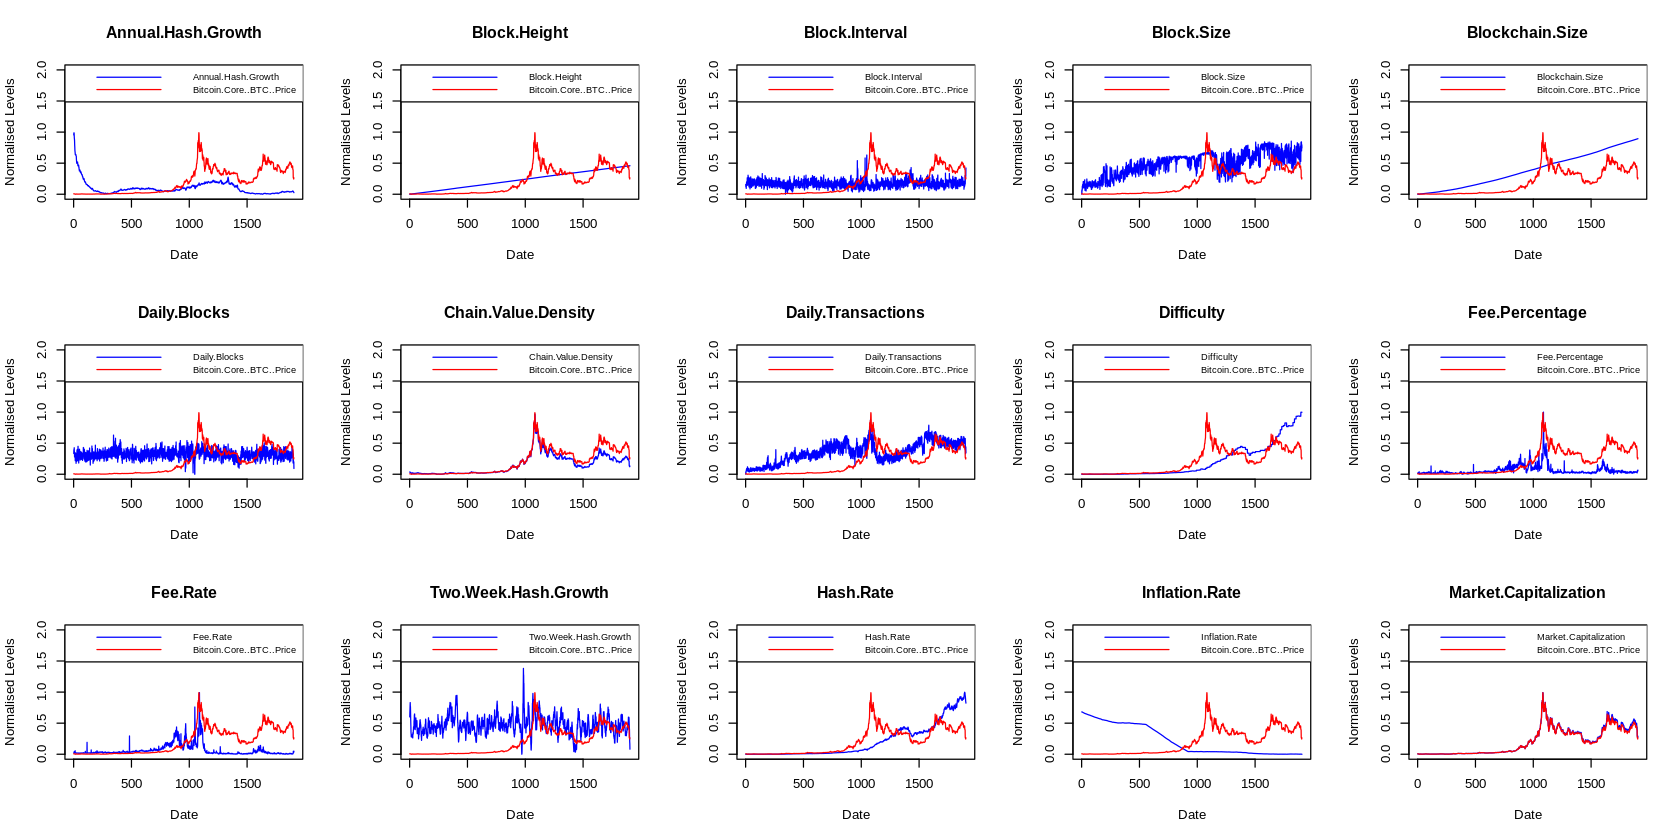

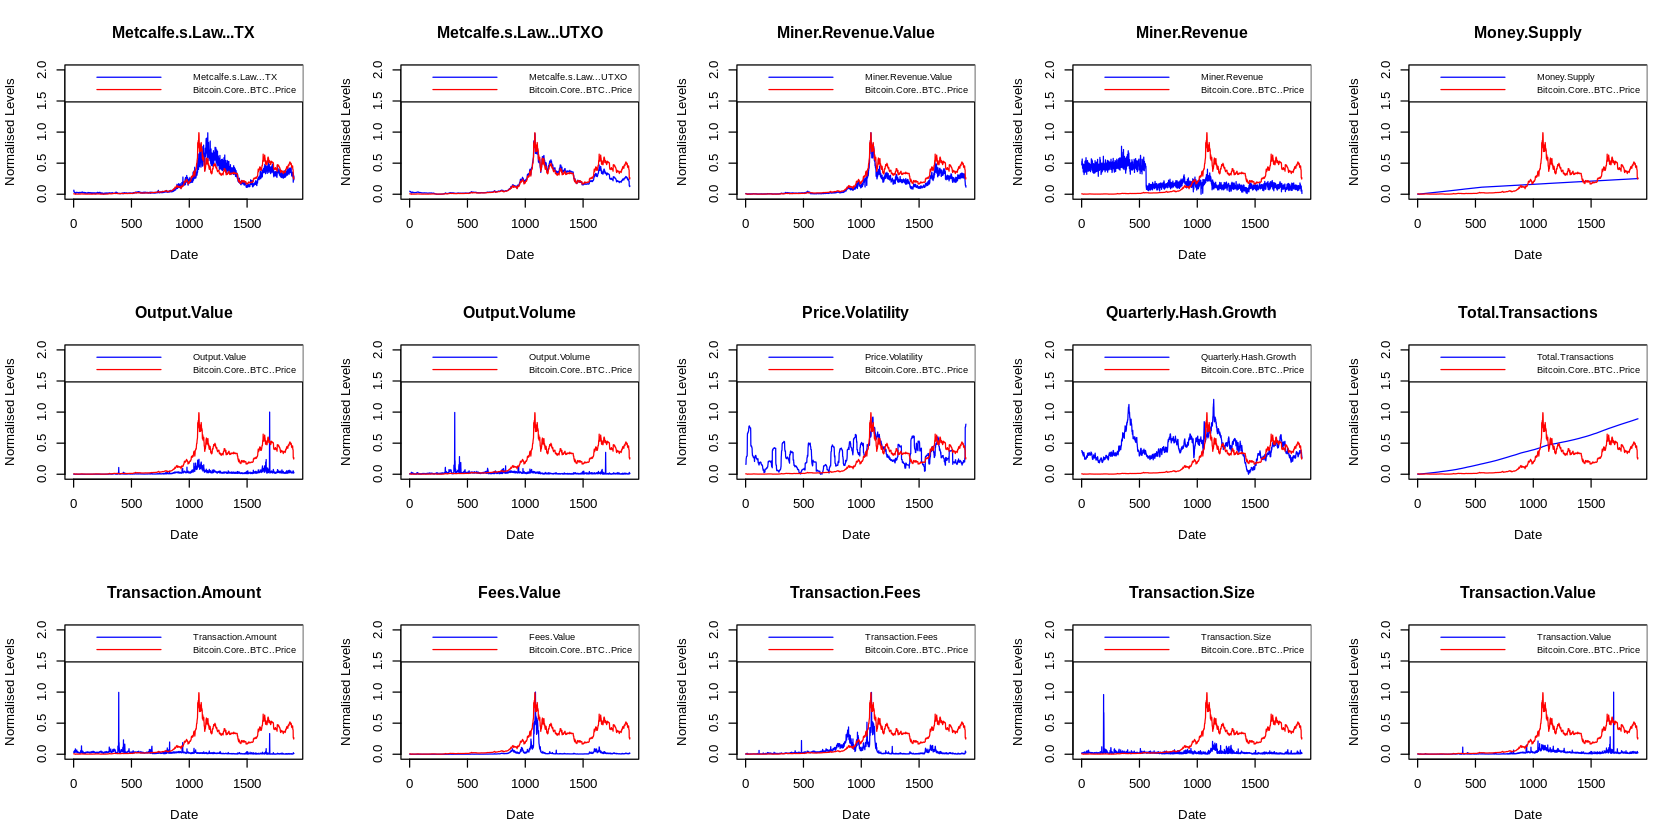

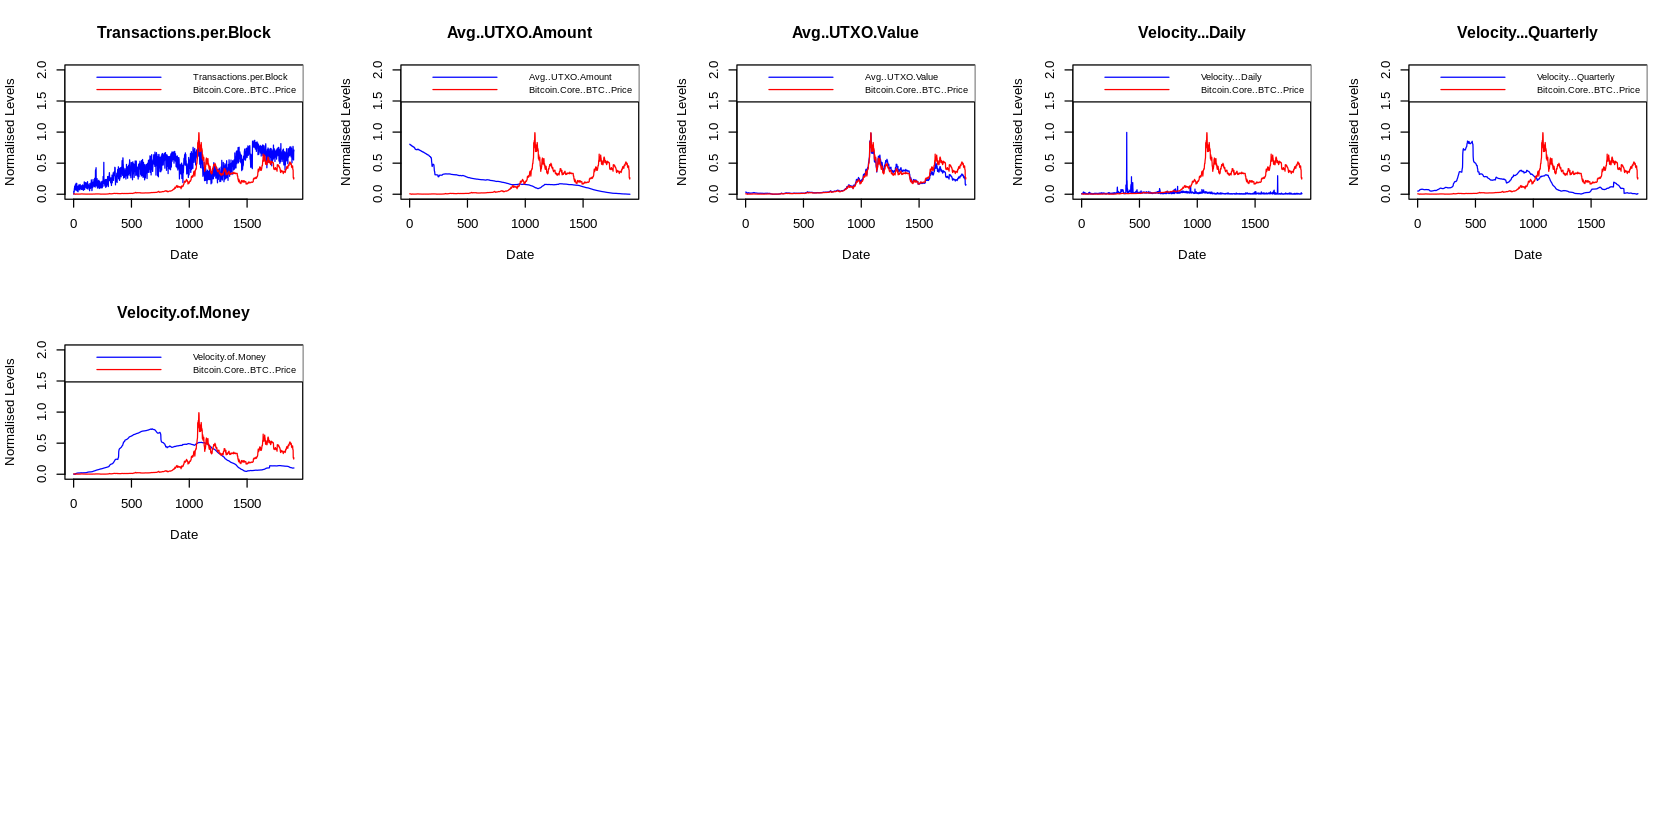

In [24]:
options(repr.plot.width=14, repr.plot.height=7)
df_colnames = colnames(df)
options(repr.width=40)
par(mfrow=c(3,5))
for (col in df_colnames) {
  if (col != 'Bitcoin.Core..BTC..Price'){
    plot((df[col][,1]-min(df[col][,1]))/max(df[col][,1]), type='l', main=col,xlab='Date',ylab='Normalised Levels',col='blue',ylim=c(0,2))
    lines((df['Bitcoin.Core..BTC..Price'][,1]-min(df['Bitcoin.Core..BTC..Price'][,1]))/max(df['Bitcoin.Core..BTC..Price'][,1]) , col = "red")
    legend('topleft', legend=c(col, "Bitcoin.Core..BTC..Price"),
       col=c("blue", "red"), lty=1:1, cex=0.7)
  }
    

}

In [25]:
#returns of series
diff = (lead(df)-df)/df
diff = diff[complete.cases(diff),]
diff$label = lead(diff$Bitcoin.Core..BTC..Price)*100
diff = diff[complete.cases(diff$label),]
head(diff)

,Annual.Hash.Growth,Block.Height,Block.Interval,Block.Size,Blockchain.Size,Daily.Blocks,Chain.Value.Density,Daily.Transactions,Difficulty,Fee.Percentage,⋯,Transaction.Fees,Transaction.Size,Transaction.Value,Transactions.per.Block,Avg..UTXO.Amount,Avg..UTXO.Value,Velocity...Daily,Velocity...Quarterly,Velocity.of.Money,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-02,0.027383441,0.0004898105,-0.074074074,-0.28239064,0.001102124,0.08552632,-0.007250060,-0.20582777,0,0.43939841,⋯,-0.26799128,-0.06217617,-0.30982773,-0.268000000,-0.0005825469,-0.007007888,-0.49160151,-0.0033144827,-0.0004684231,-0.3106181
2015-01-03,0.008530224,0.0004895707,0.000000000,0.44629277,0.001592246,0.00000000,-0.004390742,0.37905605,0,-0.03272163,⋯,0.50538476,0.05524862,0.17747360,0.377049180,-0.0023315458,-0.005431570,0.55584310,0.0009603686,-0.0002863927,-8.4954852
2015-01-04,-0.002713409,0.0004804342,0.001904762,0.06174513,0.001657179,-0.01818182,-0.086198242,-0.01981614,0,-0.20408484,⋯,-0.05290688,0.14834206,0.14454338,-0.001984127,-0.0037391914,-0.088382806,0.18958562,-0.0007382921,-0.0002187625,-6.7755386
2015-01-05,-0.043126730,0.0005098457,-0.053231939,-0.06251280,0.001646757,0.06172840,-0.068995564,0.01685751,0,0.54312239,⋯,0.84593434,-0.10334347,0.06866179,-0.041749503,-0.0022284776,-0.069850844,0.19586338,-0.0013012860,0.0012711842,1.6511368
2015-01-06,-0.040992918,0.0004621825,0.108433735,0.32114825,0.001969985,-0.09302326,0.014801778,0.15596629,0,-0.30917996,⋯,-0.25835260,0.04237288,-0.02582756,0.275933610,-0.0002351005,0.016298633,0.07326938,0.0035057201,0.0005723473,3.8719613
2015-01-07,-0.018528268,0.0004678917,-0.010869565,-0.12428181,0.001743831,0.01282051,0.037210565,-0.07166474,0,-0.21938746,⋯,-0.18679184,-0.01138211,0.30984211,-0.084552846,0.0003527337,0.039058458,0.04145265,0.0031049403,0.0004368152,3.3675739


In [26]:
# weekly realized volatility

diff$std_BTC_returns = rollapplyr(diff['Bitcoin.Core..BTC..Price'], 5, sd, fill = 0)*100


In [27]:
head(diff)

,Annual.Hash.Growth,Block.Height,Block.Interval,Block.Size,Blockchain.Size,Daily.Blocks,Chain.Value.Density,Daily.Transactions,Difficulty,Fee.Percentage,⋯,Transaction.Size,Transaction.Value,Transactions.per.Block,Avg..UTXO.Amount,Avg..UTXO.Value,Velocity...Daily,Velocity...Quarterly,Velocity.of.Money,label,std_BTC_returns
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
2015-01-02,0.027383441,0.0004898105,-0.074074074,-0.28239064,0.001102124,0.08552632,-0.007250060,-0.20582777,0,0.43939841,⋯,-0.06217617,-0.30982773,-0.268000000,-0.0005825469,-0.007007888,-0.49160151,-0.0033144827,-0.0004684231,-0.3106181,0.000000
2015-01-03,0.008530224,0.0004895707,0.000000000,0.44629277,0.001592246,0.00000000,-0.004390742,0.37905605,0,-0.03272163,⋯,0.05524862,0.17747360,0.377049180,-0.0023315458,-0.005431570,0.55584310,0.0009603686,-0.0002863927,-8.4954852,0.000000
2015-01-04,-0.002713409,0.0004804342,0.001904762,0.06174513,0.001657179,-0.01818182,-0.086198242,-0.01981614,0,-0.20408484,⋯,0.14834206,0.14454338,-0.001984127,-0.0037391914,-0.088382806,0.18958562,-0.0007382921,-0.0002187625,-6.7755386,0.000000
2015-01-05,-0.043126730,0.0005098457,-0.053231939,-0.06251280,0.001646757,0.06172840,-0.068995564,0.01685751,0,0.54312239,⋯,-0.10334347,0.06866179,-0.041749503,-0.0022284776,-0.069850844,0.19586338,-0.0013012860,0.0012711842,1.6511368,0.000000
2015-01-06,-0.040992918,0.0004621825,0.108433735,0.32114825,0.001969985,-0.09302326,0.014801778,0.15596629,0,-0.30917996,⋯,0.04237288,-0.02582756,0.275933610,-0.0002351005,0.016298633,0.07326938,0.0035057201,0.0005723473,3.8719613,4.439265
2015-01-07,-0.018528268,0.0004678917,-0.010869565,-0.12428181,0.001743831,0.01282051,0.037210565,-0.07166474,0,-0.21938746,⋯,-0.01138211,0.30984211,-0.084552846,0.0003527337,0.039058458,0.04145265,0.0031049403,0.0004368152,3.3675739,5.377294


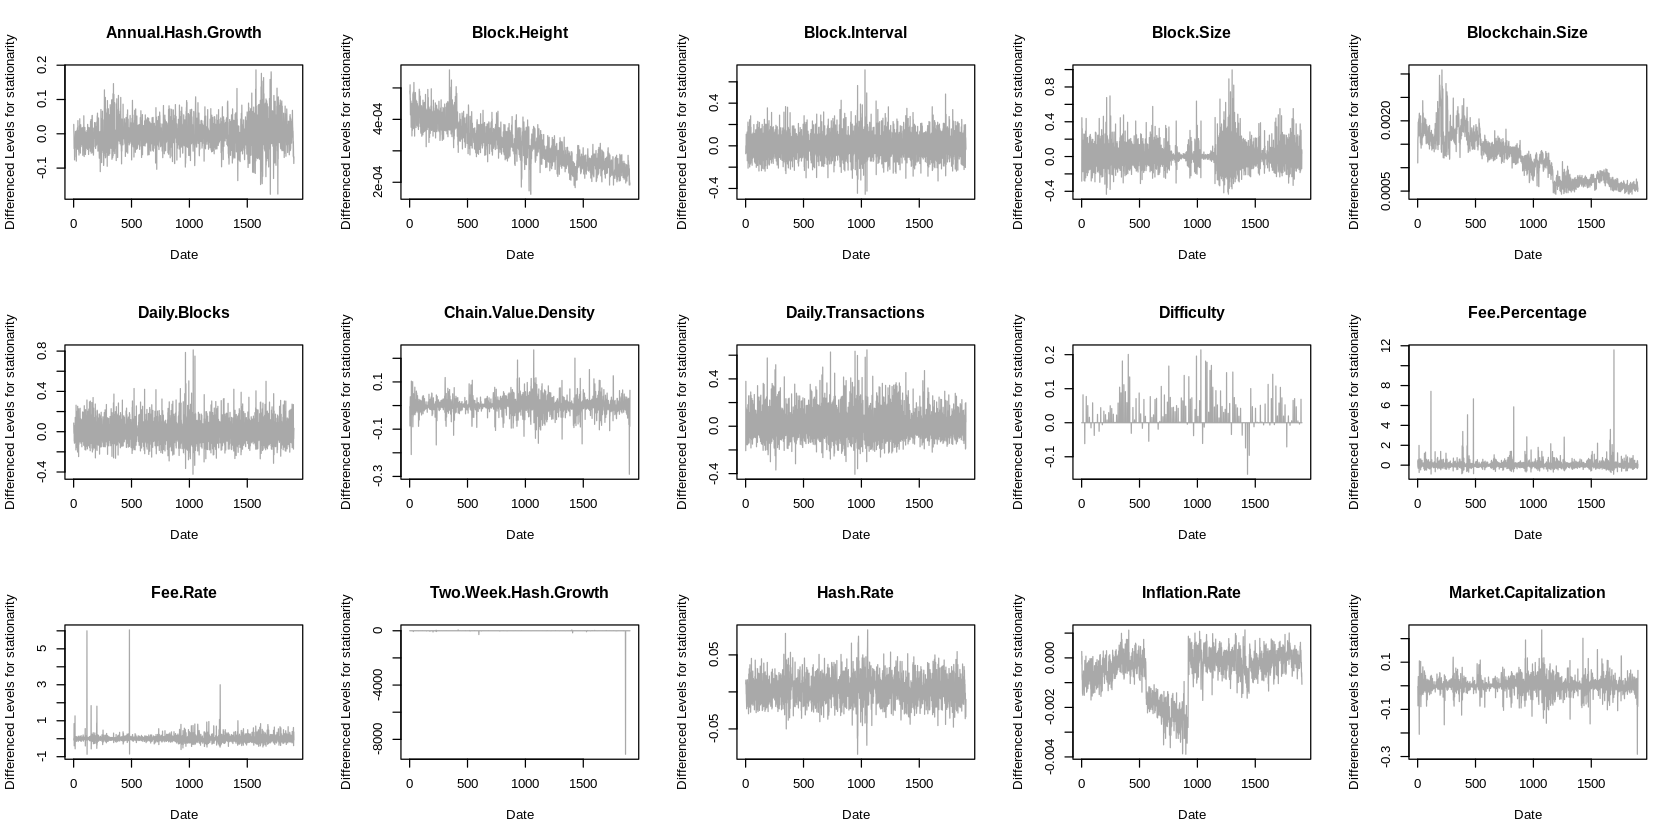

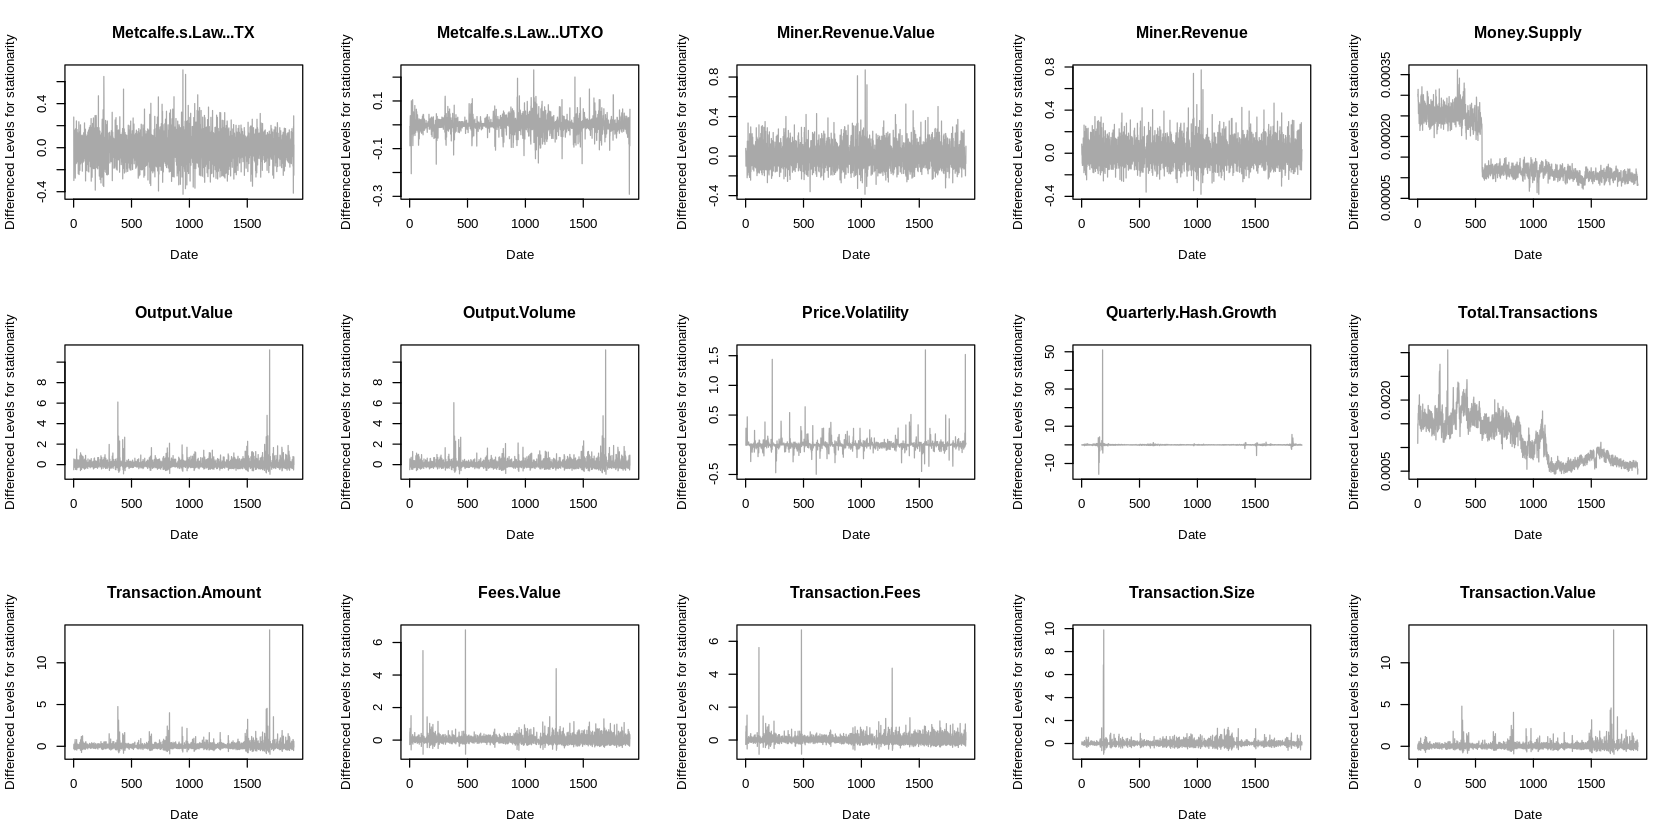

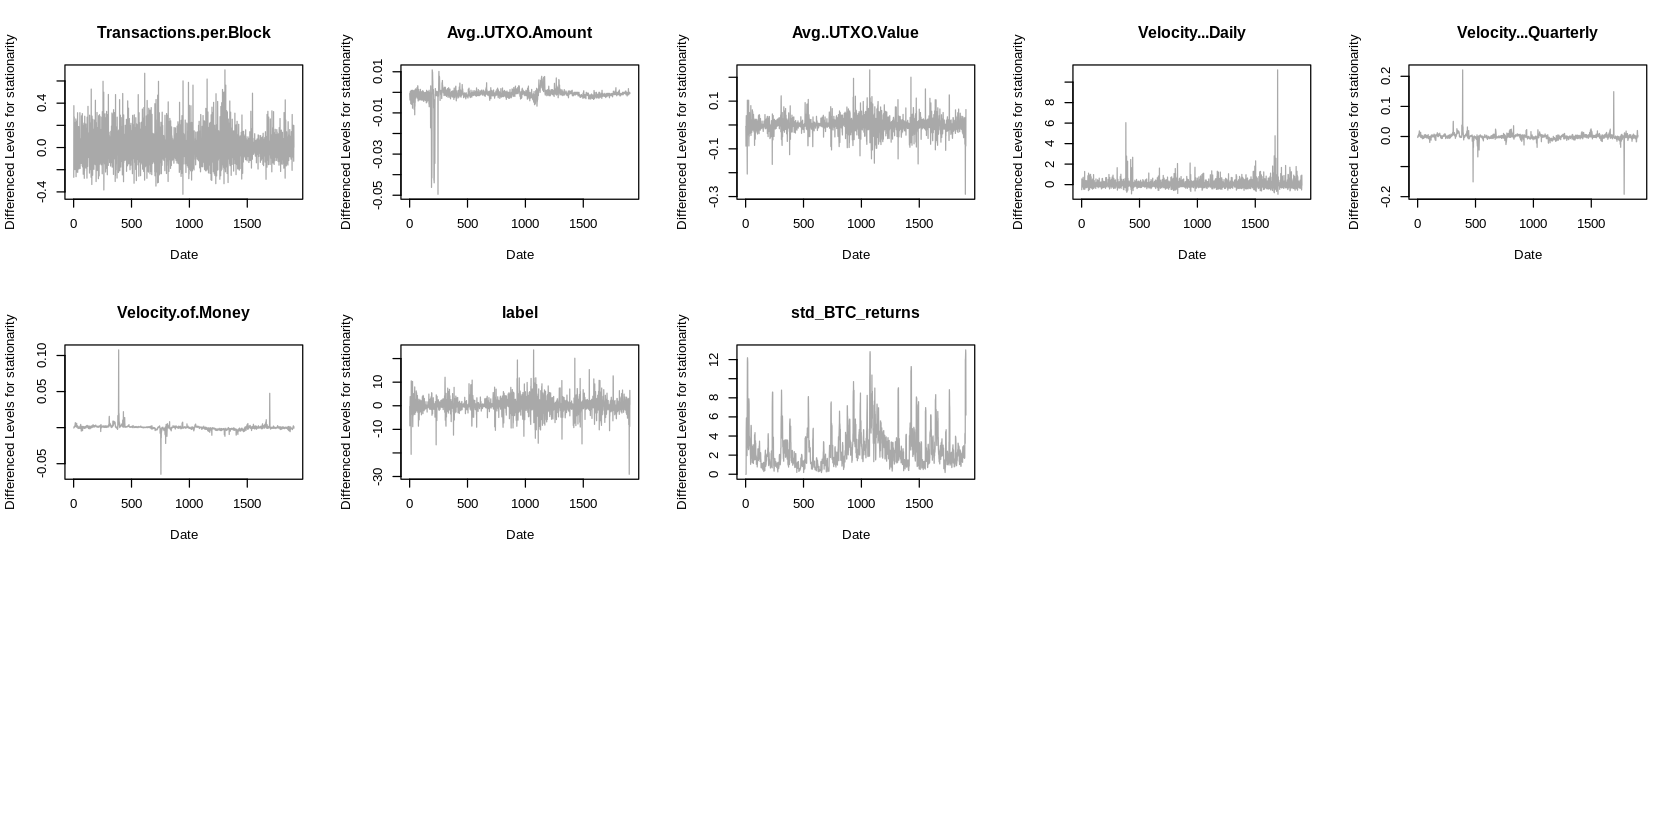

In [28]:
options(repr.plot.width=14, repr.plot.height=7)
options(repr.width=40)
par(mfrow=c(3,5))
df_colnames = colnames(diff)
for (col in df_colnames) {
  if (col != 'Bitcoin.Core..BTC..Price'){
    plot(diff[col][,1], type='l', main=col,xlab='Date',ylab='Differenced Levels for stationarity',col='darkgrey')
  }
}


In [29]:
train_size = floor(0.75 * nrow(diff))
train_data = diff[1:train_size, ]
test_data = diff[train_size:nrow(diff), ]

train_y = train_data$label
drops <- c('label')
train_X = train_data[ , !(names(train_data) %in% drops)]

In [30]:
head(train_X)

,Annual.Hash.Growth,Block.Height,Block.Interval,Block.Size,Blockchain.Size,Daily.Blocks,Chain.Value.Density,Daily.Transactions,Difficulty,Fee.Percentage,⋯,Transaction.Fees,Transaction.Size,Transaction.Value,Transactions.per.Block,Avg..UTXO.Amount,Avg..UTXO.Value,Velocity...Daily,Velocity...Quarterly,Velocity.of.Money,std_BTC_returns
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
2015-01-02,0.027383441,0.0004898105,-0.074074074,-0.28239064,0.001102124,0.08552632,-0.007250060,-0.20582777,0,0.43939841,⋯,-0.26799128,-0.06217617,-0.30982773,-0.268000000,-0.0005825469,-0.007007888,-0.49160151,-0.0033144827,-0.0004684231,0.000000
2015-01-03,0.008530224,0.0004895707,0.000000000,0.44629277,0.001592246,0.00000000,-0.004390742,0.37905605,0,-0.03272163,⋯,0.50538476,0.05524862,0.17747360,0.377049180,-0.0023315458,-0.005431570,0.55584310,0.0009603686,-0.0002863927,0.000000
2015-01-04,-0.002713409,0.0004804342,0.001904762,0.06174513,0.001657179,-0.01818182,-0.086198242,-0.01981614,0,-0.20408484,⋯,-0.05290688,0.14834206,0.14454338,-0.001984127,-0.0037391914,-0.088382806,0.18958562,-0.0007382921,-0.0002187625,0.000000
2015-01-05,-0.043126730,0.0005098457,-0.053231939,-0.06251280,0.001646757,0.06172840,-0.068995564,0.01685751,0,0.54312239,⋯,0.84593434,-0.10334347,0.06866179,-0.041749503,-0.0022284776,-0.069850844,0.19586338,-0.0013012860,0.0012711842,0.000000
2015-01-06,-0.040992918,0.0004621825,0.108433735,0.32114825,0.001969985,-0.09302326,0.014801778,0.15596629,0,-0.30917996,⋯,-0.25835260,0.04237288,-0.02582756,0.275933610,-0.0002351005,0.016298633,0.07326938,0.0035057201,0.0005723473,4.439265
2015-01-07,-0.018528268,0.0004678917,-0.010869565,-0.12428181,0.001743831,0.01282051,0.037210565,-0.07166474,0,-0.21938746,⋯,-0.18679184,-0.01138211,0.30984211,-0.084552846,0.0003527337,0.039058458,0.04145265,0.0031049403,0.0004368152,5.377294


In [31]:
std_train_X = scale(train_X)
std_train_data = cbind(std_train_X, train_y)
colnames(std_train_data)[ncol(std_train_data)] = 'label'
head(std_train_data)

,Annual.Hash.Growth,Block.Height,Block.Interval,Block.Size,Blockchain.Size,Daily.Blocks,Chain.Value.Density,Daily.Transactions,Difficulty,Fee.Percentage,⋯,Transaction.Size,Transaction.Value,Transactions.per.Block,Avg..UTXO.Amount,Avg..UTXO.Value,Velocity...Daily,Velocity...Quarterly,Velocity.of.Money,std_BTC_returns,label
2015-01-02,0.76324190,2.457299,-0.66085939,-1.9653105,-0.5299968,0.61461986,-0.2509509,-1.58499003,-0.1790174,0.8066294,⋯,-0.24441298,-0.97115828,-1.78323681,0.03947219,-0.2550368,-1.40966615,-0.29545402,-0.15250734,-1.3378192,-0.3106181
2015-01-03,0.25488408,2.453206,-0.06192003,2.9089503,0.5560045,-0.05987668,-0.1659314,2.72037107,-0.1790174,-0.1912507,⋯,0.05414819,0.34818023,2.31393196,-0.39773873,-0.2084358,1.30551507,0.09816371,-0.11338939,-1.3378192,-8.4954852
2015-01-04,-0.04828903,2.297255,-0.04651874,0.3366597,0.6998822,-0.20326615,-2.5984127,-0.21574844,-0.1790174,-0.5534466,⋯,0.29084513,0.25902369,-0.09357971,-0.74961889,-2.6607350,0.35610408,-0.05824476,-0.09885581,-1.3378192,-6.7755386
2015-01-05,-1.13799309,2.799282,-0.49233653,-0.4945182,0.6767890,0.42693943,-2.0869047,0.05420829,-0.1790174,1.0258620,⋯,-0.34908387,0.05357892,-0.34615806,-0.37197396,-2.1128720,0.37237725,-0.11008385,0.22133063,-1.3378192,1.6511368
2015-01-06,-1.08045702,1.985715,0.81484058,2.0718418,1.3929914,-0.79349723,0.4047430,1.07819542,-0.1790174,-0.7755772,⋯,0.02141068,-0.20224521,1.67167464,0.12632608,0.4339772,0.05458964,0.33253339,0.07115204,0.9477886,3.8719613
2015-01-07,-0.47472059,2.083166,-0.14980787,-0.9076994,0.8918839,0.04123129,1.0710506,-0.59740874,-0.1790174,-0.5857905,⋯,-0.11526536,0.70655988,-0.61803270,0.27327159,1.1068292,-0.02788556,0.29563058,0.04202647,1.4307435,3.3675739


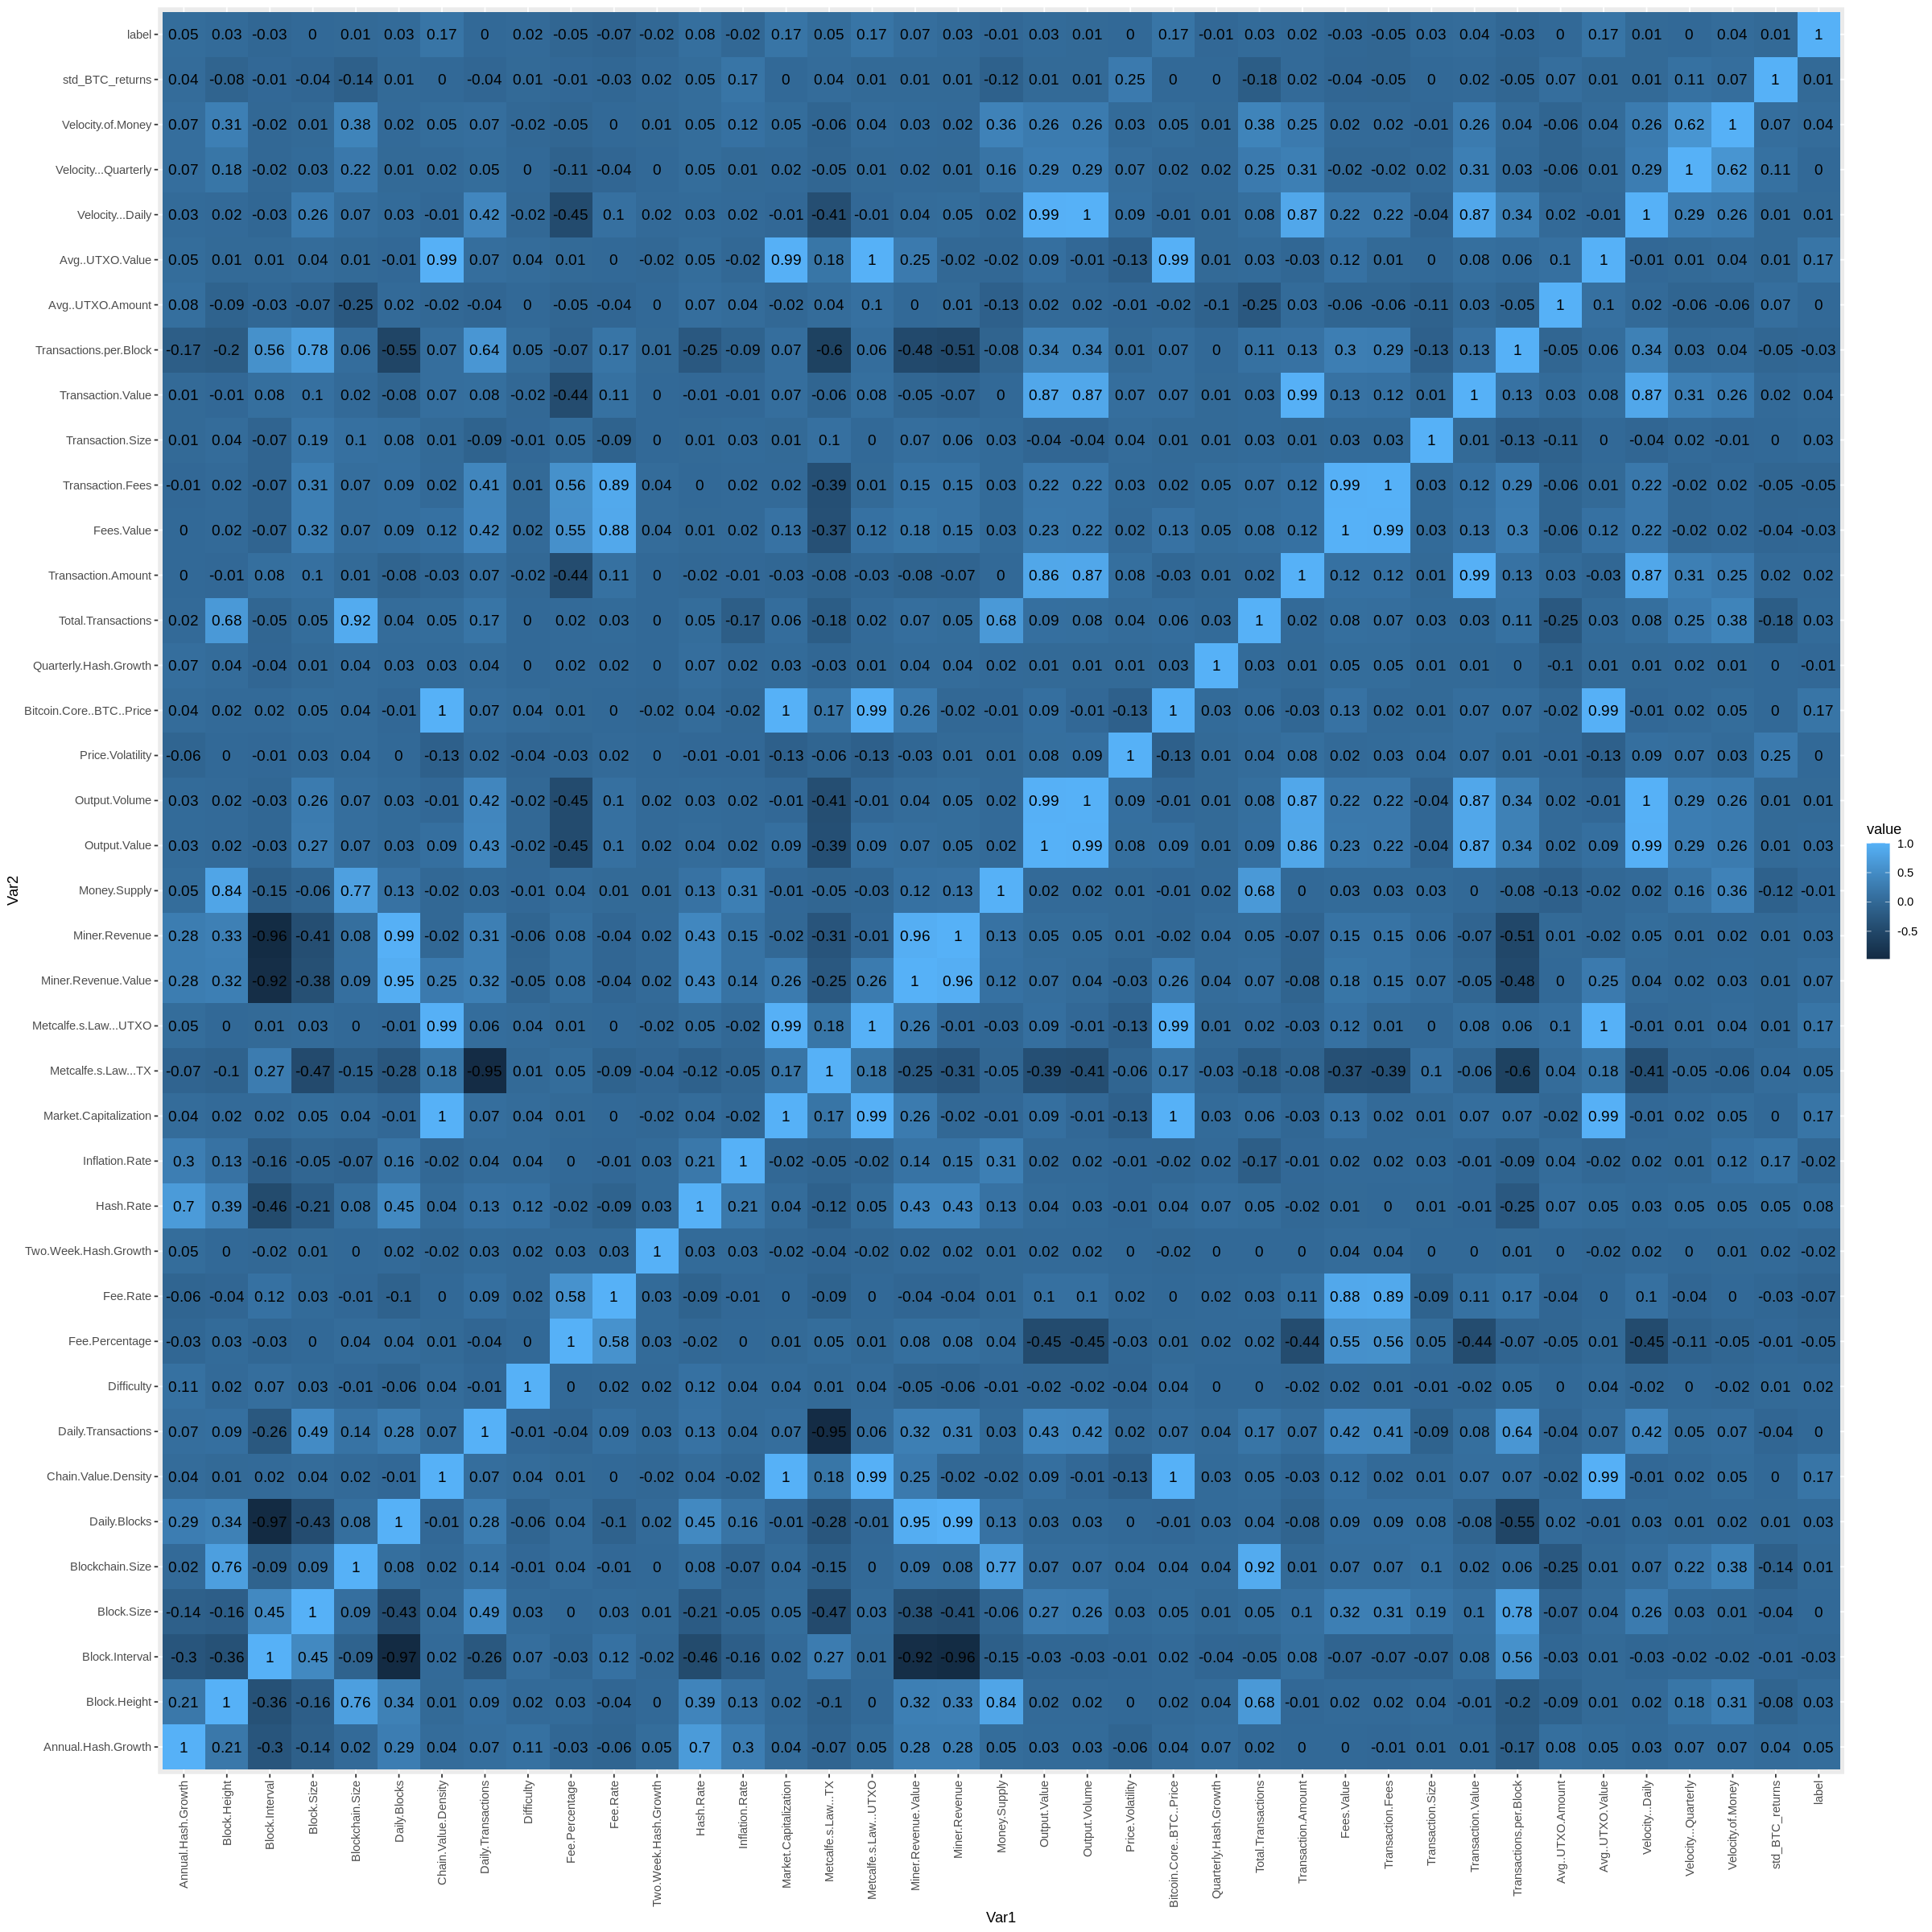

In [32]:

# creating correlation matrix
corr_mat <- round(cor(std_train_data, method='pearson'),2)
 
# reduce the size of correlation matrix
melted_corr_mat <- melt(corr_mat)
# head(melted_corr_mat)

options(repr.plot.width=20, repr.plot.height=20)
 
# plotting the correlation heatmap
ggplot(data = melted_corr_mat, aes(x=Var1, y=Var2,
                                   fill=value)) +
geom_tile() +
geom_text(aes(Var2, Var1, label = value),
          color = "black", size = 4) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [33]:
corr_mat

,Annual.Hash.Growth,Block.Height,Block.Interval,Block.Size,Blockchain.Size,Daily.Blocks,Chain.Value.Density,Daily.Transactions,Difficulty,Fee.Percentage,⋯,Transaction.Size,Transaction.Value,Transactions.per.Block,Avg..UTXO.Amount,Avg..UTXO.Value,Velocity...Daily,Velocity...Quarterly,Velocity.of.Money,std_BTC_returns,label
Annual.Hash.Growth,1.00,0.21,-0.30,-0.14,0.02,0.29,0.04,0.07,0.11,-0.03,⋯,0.01,0.01,-0.17,0.08,0.05,0.03,0.07,0.07,0.04,0.05
Block.Height,0.21,1.00,-0.36,-0.16,0.76,0.34,0.01,0.09,0.02,0.03,⋯,0.04,-0.01,-0.20,-0.09,0.01,0.02,0.18,0.31,-0.08,0.03
Block.Interval,-0.30,-0.36,1.00,0.45,-0.09,-0.97,0.02,-0.26,0.07,-0.03,⋯,-0.07,0.08,0.56,-0.03,0.01,-0.03,-0.02,-0.02,-0.01,-0.03
Block.Size,-0.14,-0.16,0.45,1.00,0.09,-0.43,0.04,0.49,0.03,0.00,⋯,0.19,0.10,0.78,-0.07,0.04,0.26,0.03,0.01,-0.04,0.00
Blockchain.Size,0.02,0.76,-0.09,0.09,1.00,0.08,0.02,0.14,-0.01,0.04,⋯,0.10,0.02,0.06,-0.25,0.01,0.07,0.22,0.38,-0.14,0.01
Daily.Blocks,0.29,0.34,-0.97,-0.43,0.08,1.00,-0.01,0.28,-0.06,0.04,⋯,0.08,-0.08,-0.55,0.02,-0.01,0.03,0.01,0.02,0.01,0.03
Chain.Value.Density,0.04,0.01,0.02,0.04,0.02,-0.01,1.00,0.07,0.04,0.01,⋯,0.01,0.07,0.07,-0.02,0.99,-0.01,0.02,0.05,0.00,0.17
Daily.Transactions,0.07,0.09,-0.26,0.49,0.14,0.28,0.07,1.00,-0.01,-0.04,⋯,-0.09,0.08,0.64,-0.04,0.07,0.42,0.05,0.07,-0.04,0.00
Difficulty,0.11,0.02,0.07,0.03,-0.01,-0.06,0.04,-0.01,1.00,0.00,⋯,-0.01,-0.02,0.05,0.00,0.04,-0.02,0.00,-0.02,0.01,0.02
Fee.Percentage,-0.03,0.03,-0.03,0.00,0.04,0.04,0.01,-0.04,0.00,1.00,⋯,0.05,-0.44,-0.07,-0.05,0.01,-0.45,-0.11,-0.05,-0.01,-0.05


In [34]:
write.csv(as.data.frame(corr_mat),'Correlation matrix.csv')

In [35]:
# cor_matrix_rm[upper.tri(corr_mat)] <- 0
# diag(corr_mat) <- 0
count_list = c()
for(row in 1:nrow(corr_mat)) {
    count=0
    for(col in 1:ncol(corr_mat)) {
      if(abs(corr_mat[row,col]) >= 0.75) {

        count = count+1
      }
    }
    count_list = c(count_list, count)
}


In [36]:
corr_add = as.data.frame(cbind(rownames(corr_mat), count_list))
corr_add[order(corr_add$count_list),c(1,2)]


,V1,count_list
,<chr>,<chr>
1,Annual.Hash.Growth,1
9,Difficulty,1
10,Fee.Percentage,1
12,Two.Week.Hash.Growth,1
13,Hash.Rate,1
14,Inflation.Rate,1
23,Price.Volatility,1
25,Quarterly.Hash.Growth,1
30,Transaction.Size,1


In [37]:
drops <- c('Annual.Hash.Growth','Block.Height','Block.Interval','Block.Size','Daily.Transactions','Difficulty','Fee.Percentage','Fee.Rate','Two.Week.Hash.Growth','Hash.Rate','Inflation.Rate','Price.Volatility','Bitcoin.Core..BTC..Price','Quarterly.Hash.Growth','Total.Transactions','Transaction.Size','Avg..UTXO.Amount','Velocity...Daily','Velocity...Quarterly','Velocity.of.Money','std_BTC_returns','label')
df_new = diff[ , (names(diff) %in% drops)]
head(df_new)

,Annual.Hash.Growth,Block.Height,Block.Interval,Block.Size,Daily.Transactions,Difficulty,Fee.Percentage,Fee.Rate,Two.Week.Hash.Growth,Hash.Rate,⋯,Bitcoin.Core..BTC..Price,Quarterly.Hash.Growth,Total.Transactions,Transaction.Size,Avg..UTXO.Amount,Velocity...Daily,Velocity...Quarterly,Velocity.of.Money,label,std_BTC_returns
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
2015-01-02,0.027383441,0.0004898105,-0.074074074,-0.28239064,-0.20582777,0,0.43939841,-0.07142857,0.32470218,0.010752397,⋯,-0.006455676,-0.006515378,0.001087621,-0.06217617,-0.0005825469,-0.49160151,-0.0033144827,-0.0004684231,-0.3106181,0.000000
2015-01-03,0.008530224,0.0004895707,0.000000000,0.44629277,0.37905605,0,-0.03272163,0.03846154,0.17293335,0.015980108,⋯,-0.003106181,-0.018259077,0.001498261,0.05524862,-0.0023315458,0.55584310,0.0009603686,-0.0002863927,-8.4954852,0.000000
2015-01-04,-0.002713409,0.0004804342,0.001904762,0.06174513,-0.01981614,0,-0.20408484,-0.07407407,0.18898276,0.013020884,⋯,-0.084954852,-0.111432640,0.001466375,0.14834206,-0.0037391914,0.18958562,-0.0007382921,-0.0002187625,-6.7755386,0.000000
2015-01-05,-0.043126730,0.0005098457,-0.053231939,-0.06251280,0.01685751,0,0.54312239,0.84000000,0.10973817,0.007057378,⋯,-0.067755386,-0.076812386,0.001488911,-0.10334347,-0.0022284776,0.19586338,-0.0013012860,0.0012711842,1.6511368,0.000000
2015-01-06,-0.040992918,0.0004621825,0.108433735,0.32114825,0.15596629,0,-0.30917996,-0.39130435,-0.13194374,-0.002853458,⋯,0.016511368,0.080142141,0.001718572,0.04237288,-0.0002351005,0.07326938,0.0035057201,0.0005723473,3.8719613,4.439265
2015-01-07,-0.018528268,0.0004678917,-0.010869565,-0.12428181,-0.07166474,0,-0.21938746,-0.07142857,-0.01508523,0.002661934,⋯,0.038719613,0.065997234,0.001592674,-0.01138211,0.0003527337,0.04145265,0.0031049403,0.0004368152,3.3675739,5.377294


In [38]:
train_size = floor(0.75 * nrow(df_new))
train_data = df_new[1:train_size, ]
test_data = df_new[train_size:nrow(df_new), ]

train_y = train_data$label


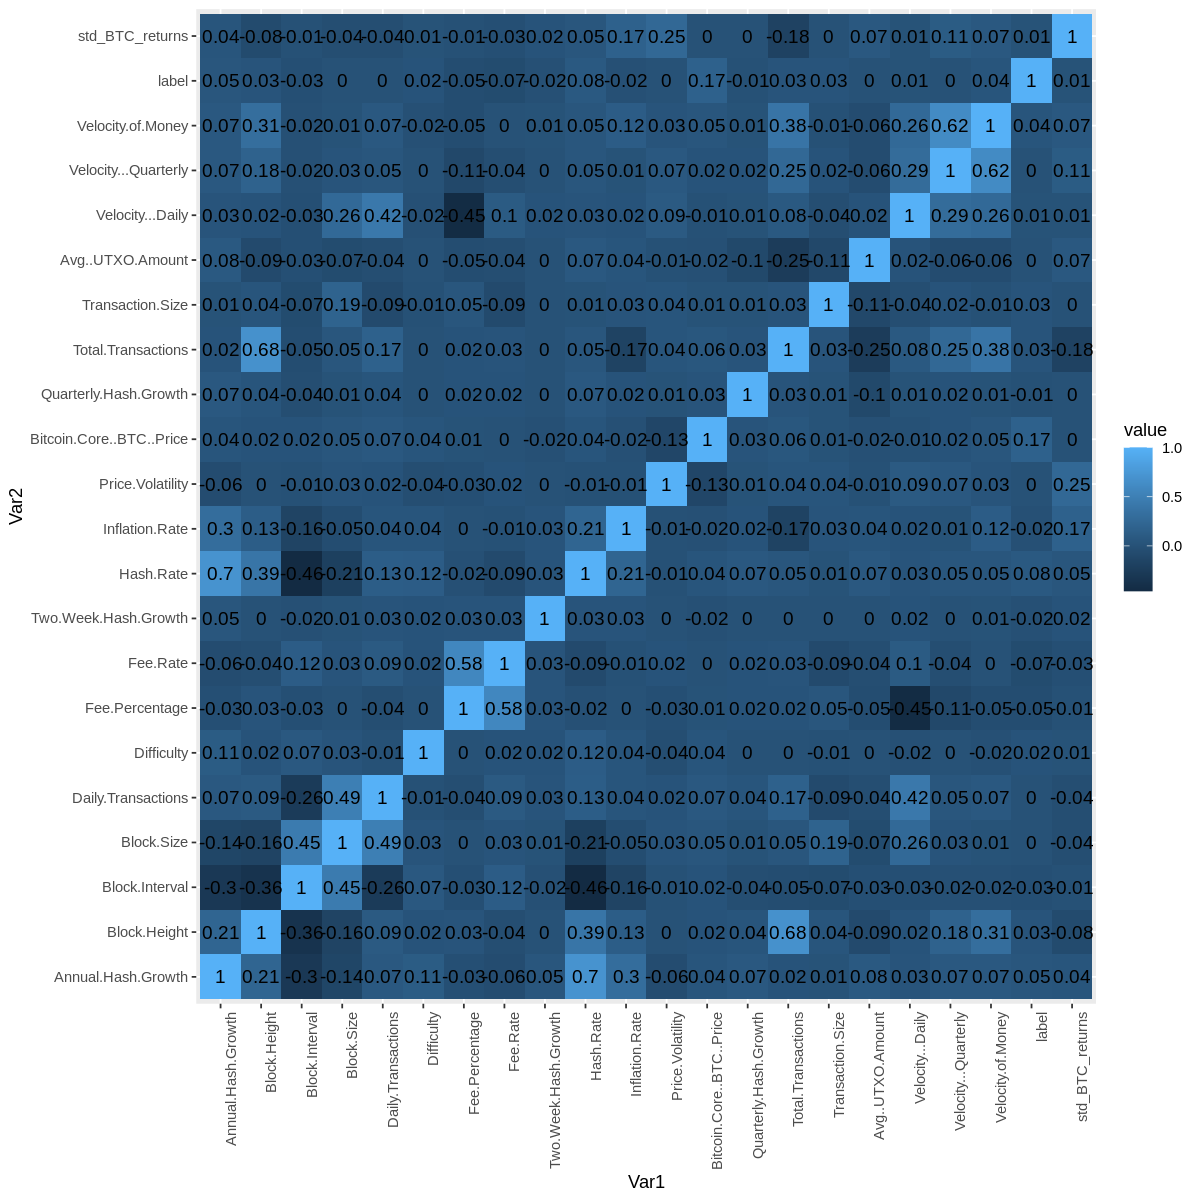

In [39]:
# creating correlation matrix
corr_mat <- round(cor(train_data, method='pearson'),2)
 
# reduce the size of correlation matrix
melted_corr_mat <- melt(corr_mat)
# head(melted_corr_mat)

options(repr.plot.width=10, repr.plot.height=10)
 
# plotting the correlation heatmap
ggplot(data = melted_corr_mat, aes(x=Var1, y=Var2,
                                   fill=value)) +
geom_tile() +
geom_text(aes(Var2, Var1, label = value),
          color = "black", size = 4) + theme(axis.text.x = element_text(angle = 90, vjust = 1.5, hjust=1))

In [40]:
count_list = c()
for(row in 1:nrow(corr_mat)) {
    count=0
    for(col in 1:ncol(corr_mat)) {
      if(abs(corr_mat[row,col]) >= 0.75) {

        count = count+1
      }
    }
    count_list = c(count_list, count)
}

In [41]:
corr_add = as.data.frame(cbind(rownames(corr_mat), count_list))
corr_add[order(corr_add$count_list),c(1,2)]

,V1,count_list
,<chr>,<chr>
1,Annual.Hash.Growth,1
2,Block.Height,1
3,Block.Interval,1
4,Block.Size,1
5,Daily.Transactions,1
6,Difficulty,1
7,Fee.Percentage,1
8,Fee.Rate,1
9,Two.Week.Hash.Growth,1


#### EDA on Macro variables

In [42]:
# Macro variables 
df_macro = read.csv("https://raw.githubusercontent.com/DN612/Crypto-Analysis/main/Data%20Sources/Weekday_macro.csv")
df_macro$Date = as.Date(df_macro$Date, format="%d/%m/%Y")
# # df
rownames(df_macro) <- df_macro$Date
drops <- c('Date')
df_macro = df_macro[ , !(names(df_macro) %in% drops)]
head(df_macro)

,DIA.US.Index,CNYUSD.Curncy,EURUSD.Curncy,GDX.US.Equity,VIX.Index,VVIX.Index,SHCOMP.Index,TWSE.Index,SPX.Index,ADS_Index,Google.trends,Sentiment.Score,Bitcoin.Core..BTC..Price,Lumber.prices,WTI.Oil
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-01,177.88,0.16109,1.2104,18.38,19.20,113.08,3234.678,9307.26,2058.90,-0.213298,50,0.0000,317.55,328.2,53.27
2015-01-02,177.94,0.16112,1.2002,18.94,17.79,112.55,3234.678,9307.26,2058.20,-0.228104,51,0.0000,315.50,327.6,52.69
2015-01-05,174.84,0.16072,1.1933,19.44,19.92,121.87,3350.519,9274.11,2020.58,-0.267953,67,0.0000,268.30,325.6,50.04
2015-01-06,173.39,0.16088,1.1890,20.47,21.12,118.45,3351.446,9048.34,2002.61,-0.279667,74,0.2023,272.73,317.4,47.93
2015-01-07,175.59,0.16099,1.1839,20.09,19.31,107.69,3373.954,9080.09,2025.90,-0.290595,54,0.0000,283.29,322.7,48.65
2015-01-08,178.76,0.16099,1.1793,19.79,17.01,98.44,3293.456,9238.03,2062.14,-0.300740,60,0.0000,292.83,320.2,48.79


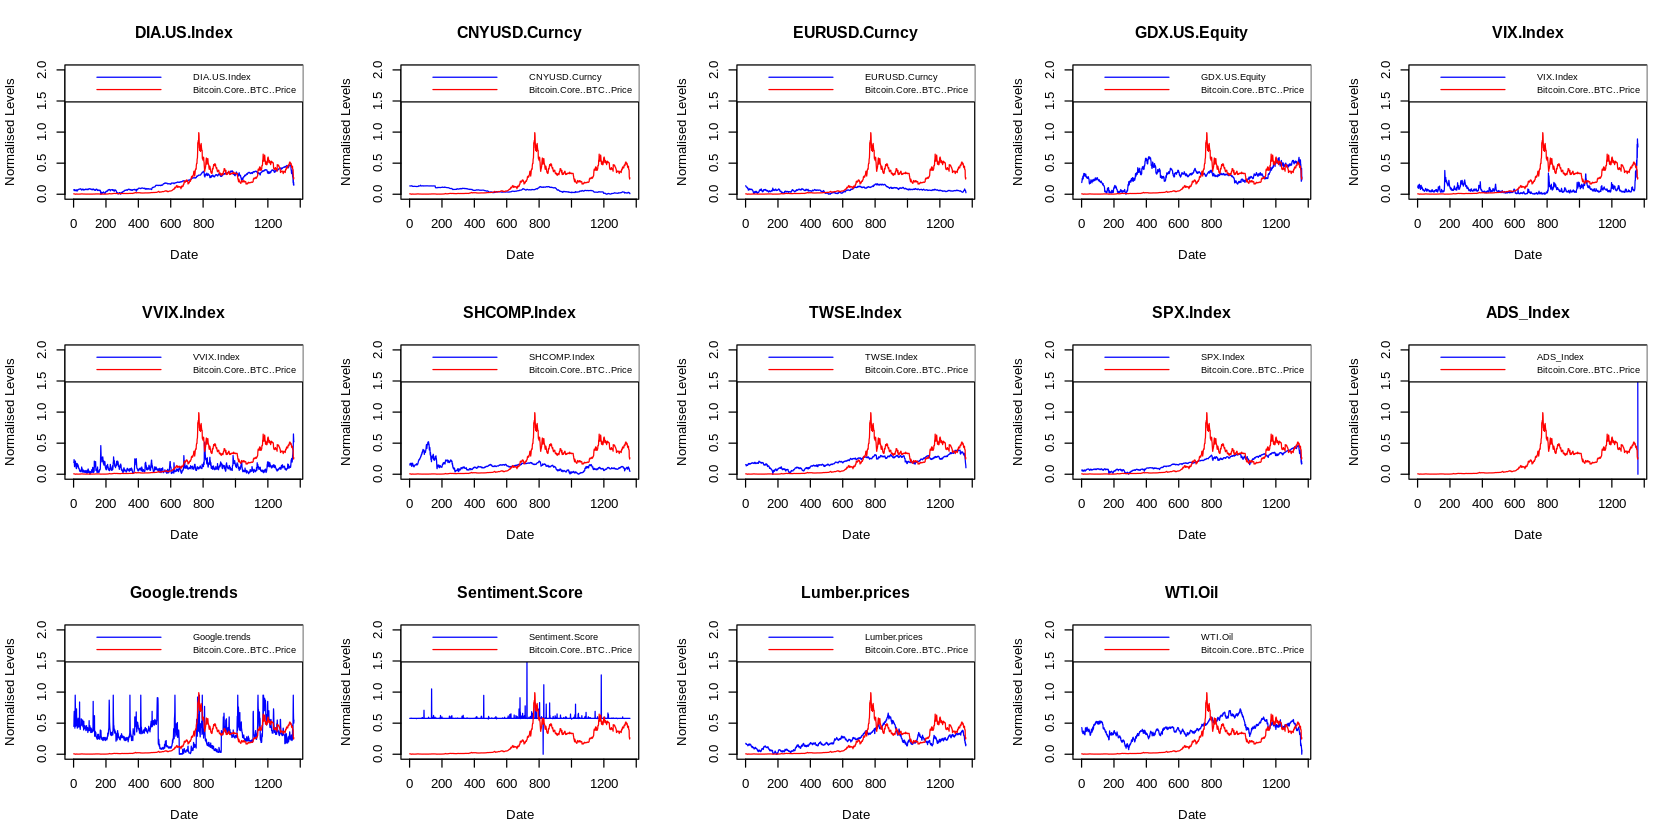

In [43]:
options(repr.plot.width=14, repr.plot.height=7)
df_colnames = colnames(df_macro)
options(repr.width=40)
par(mfrow=c(3,5))

for (col in df_colnames) {
  if (col != 'Bitcoin.Core..BTC..Price'){
    plot((df_macro[col][,1]-min(df_macro[col][,1]))/max(df_macro[col][,1]), type='l', main=col,xlab='Date',ylab='Normalised Levels',col='blue',ylim=c(0,2))
    lines((df_macro['Bitcoin.Core..BTC..Price'][,1]-min(df_macro['Bitcoin.Core..BTC..Price'][,1]))/max(df_macro['Bitcoin.Core..BTC..Price'][,1]) , col = "red")
    legend('topleft', legend=c(col, "Bitcoin.Core..BTC..Price"),
       col=c("blue", "red"), lty=1:1, cex=0.7)
  }
}

In [44]:
#returns of series
diff_macro = (lead(df_macro)-df_macro)/df_macro
diff_macro = diff_macro[complete.cases(diff_macro),]
diff_macro$label = lead(diff_macro$Bitcoin.Core..BTC..Price)*100
diff_macro = diff_macro[complete.cases(diff_macro$label),]
head(diff_macro)

,DIA.US.Index,CNYUSD.Curncy,EURUSD.Curncy,GDX.US.Equity,VIX.Index,VVIX.Index,SHCOMP.Index,TWSE.Index,SPX.Index,ADS_Index,Google.trends,Sentiment.Score,Bitcoin.Core..BTC..Price,Lumber.prices,WTI.Oil,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-06,-0.008293297,0.0009955202,-0.0036034526,0.05298354,0.06024096,-0.02806269,0.0002766736,-0.024344115,-0.008893486,0.04371662,0.10447761,Inf,0.016511368,-0.0251842752,-0.042166267,3.8719613
2015-01-07,0.012688160,0.0006837394,-0.0042893188,-0.01856375,-0.08570076,-0.09084002,0.0067159071,0.003508931,0.011629823,0.03907504,-0.27027027,-1,0.038719613,0.0166981727,0.015021907,-12.2323931
2015-01-14,-0.010910331,0.0000000000,0.0013590419,-0.01167883,0.04474708,0.03918696,-0.0039761370,-0.005586126,-0.005813063,0.02230177,0.56250000,Inf,-0.122323931,-0.0006345178,0.058531270,-20.5738368
2015-01-15,-0.005745145,0.0015487548,-0.0132326745,0.05760709,0.04236499,0.03145374,0.0353825381,-0.001649196,-0.009247888,0.02164933,-0.16000000,-1,-0.205738368,-0.0015873016,-0.043931159,-0.4684533
2015-02-27,-0.004505247,-0.0013142249,-0.0001786033,0.01526718,-0.04097771,-0.01955596,0.0036214989,0.000000000,-0.002956309,-0.01155102,0.06666667,-Inf,-0.004684533,0.0165517241,0.033008096,9.1545115
2015-03-02,0.008223412,-0.0011279609,-0.0010718114,-0.02443609,-0.02248876,-0.03977473,0.0078488283,-0.002155455,0.006124970,-0.04053884,0.06250000,-1,0.091545115,0.0050881954,-0.003416399,-3.3833311


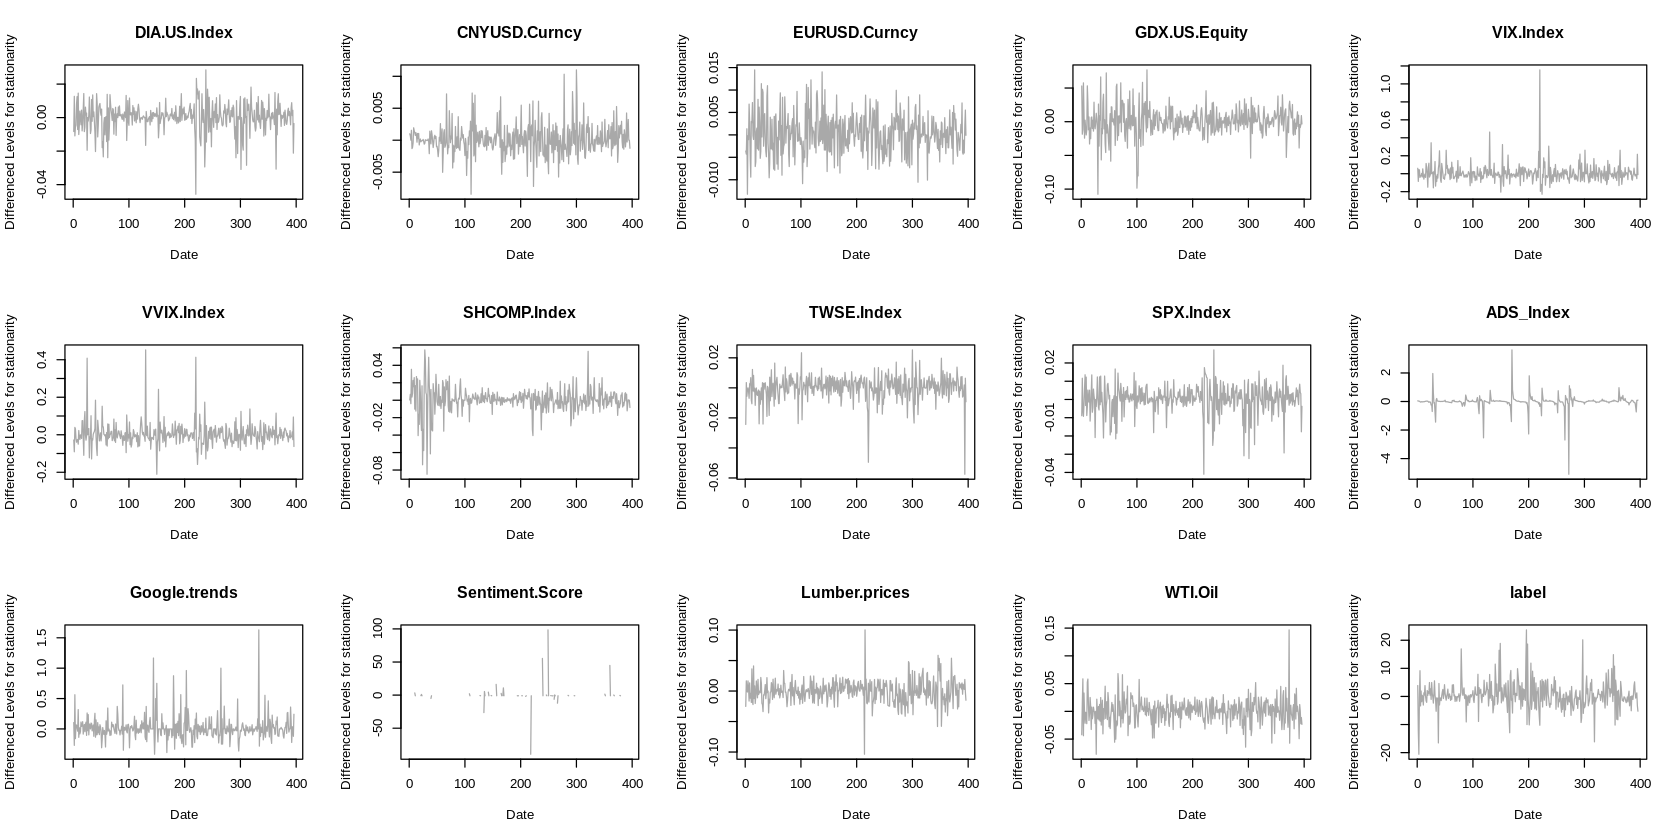

In [45]:
df_colnames = colnames(diff_macro)
options(repr.plot.width=14, repr.plot.height=7)
par(mfrow=c(3,5))

for (col in df_colnames) {
  if (col != 'Bitcoin.Core..BTC..Price'){
    plot(diff_macro[col][,1], type='l', main=col,xlab='Date',ylab='Differenced Levels for stationarity',col='darkgrey')   
  }
}


In [46]:
train_size = floor(0.75 * nrow(diff_macro))
train_data = diff_macro[1:train_size, ]
drops <- c('Sentiment.Score')
train_data = train_data[ , !(names(train_data) %in% drops)]
test_data = diff_macro[train_size:nrow(diff_macro), ]

train_y = train_data$label
drops <- c('label')
train_X = train_data[ , !(names(train_data) %in% drops)]

In [47]:
head(train_X)

,DIA.US.Index,CNYUSD.Curncy,EURUSD.Curncy,GDX.US.Equity,VIX.Index,VVIX.Index,SHCOMP.Index,TWSE.Index,SPX.Index,ADS_Index,Google.trends,Bitcoin.Core..BTC..Price,Lumber.prices,WTI.Oil
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-06,-0.008293297,0.0009955202,-0.0036034526,0.05298354,0.06024096,-0.02806269,0.0002766736,-0.024344115,-0.008893486,0.04371662,0.10447761,0.016511368,-0.0251842752,-0.042166267
2015-01-07,0.012688160,0.0006837394,-0.0042893188,-0.01856375,-0.08570076,-0.09084002,0.0067159071,0.003508931,0.011629823,0.03907504,-0.27027027,0.038719613,0.0166981727,0.015021907
2015-01-14,-0.010910331,0.0000000000,0.0013590419,-0.01167883,0.04474708,0.03918696,-0.0039761370,-0.005586126,-0.005813063,0.02230177,0.56250000,-0.122323931,-0.0006345178,0.058531270
2015-01-15,-0.005745145,0.0015487548,-0.0132326745,0.05760709,0.04236499,0.03145374,0.0353825381,-0.001649196,-0.009247888,0.02164933,-0.16000000,-0.205738368,-0.0015873016,-0.043931159
2015-02-27,-0.004505247,-0.0013142249,-0.0001786033,0.01526718,-0.04097771,-0.01955596,0.0036214989,0.000000000,-0.002956309,-0.01155102,0.06666667,-0.004684533,0.0165517241,0.033008096
2015-03-02,0.008223412,-0.0011279609,-0.0010718114,-0.02443609,-0.02248876,-0.03977473,0.0078488283,-0.002155455,0.006124970,-0.04053884,0.06250000,0.091545115,0.0050881954,-0.003416399


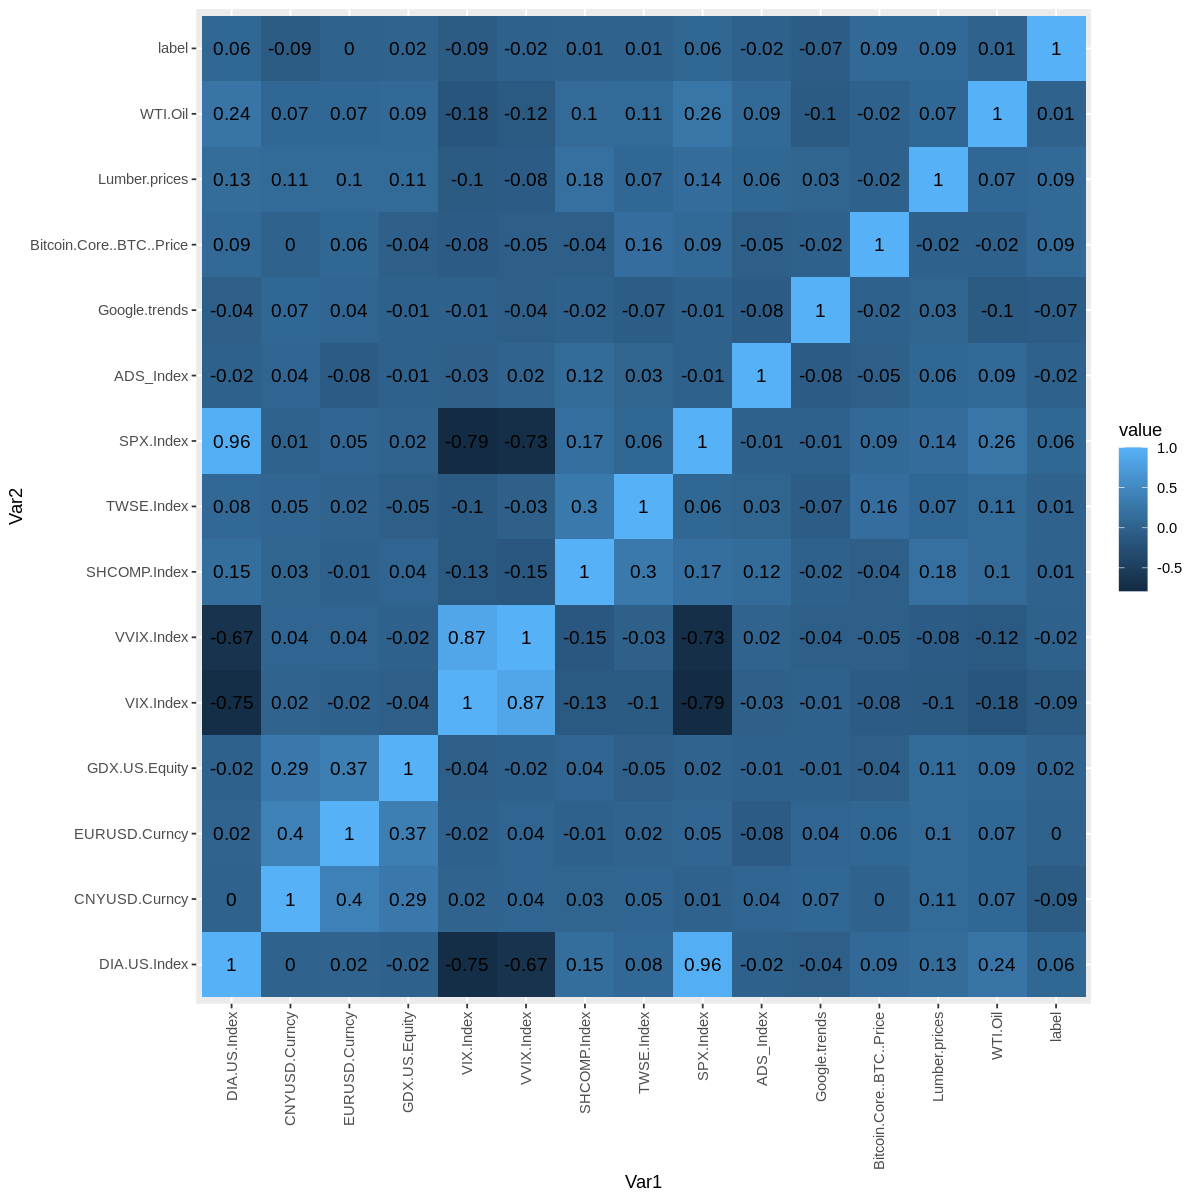

In [48]:
# creating correlation matrix
corr_mat <- round(cor(train_data, method='pearson'),2)
 
# reduce the size of correlation matrix
melted_corr_mat <- melt(corr_mat)
# head(melted_corr_mat)

options(repr.plot.width=10, repr.plot.height=10)
 
# plotting the correlation heatmap
library(ggplot2)
ggplot(data = melted_corr_mat, aes(x=Var1, y=Var2,
                                   fill=value)) +
geom_tile() +
geom_text(aes(Var2, Var1, label = value),
          color = "black", size = 4) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [49]:
count_list = c()
for(row in 1:nrow(corr_mat)) {
    count=0
    for(col in 1:ncol(corr_mat)) {
      if(abs(corr_mat[row,col]) >= 0.75) {

        count = count+1
      }
    }
    count_list = c(count_list, count)
}

In [50]:
corr_mat

,DIA.US.Index,CNYUSD.Curncy,EURUSD.Curncy,GDX.US.Equity,VIX.Index,VVIX.Index,SHCOMP.Index,TWSE.Index,SPX.Index,ADS_Index,Google.trends,Bitcoin.Core..BTC..Price,Lumber.prices,WTI.Oil,label
DIA.US.Index,1.00,0.00,0.02,-0.02,-0.75,-0.67,0.15,0.08,0.96,-0.02,-0.04,0.09,0.13,0.24,0.06
CNYUSD.Curncy,0.00,1.00,0.40,0.29,0.02,0.04,0.03,0.05,0.01,0.04,0.07,0.00,0.11,0.07,-0.09
EURUSD.Curncy,0.02,0.40,1.00,0.37,-0.02,0.04,-0.01,0.02,0.05,-0.08,0.04,0.06,0.10,0.07,0.00
GDX.US.Equity,-0.02,0.29,0.37,1.00,-0.04,-0.02,0.04,-0.05,0.02,-0.01,-0.01,-0.04,0.11,0.09,0.02
VIX.Index,-0.75,0.02,-0.02,-0.04,1.00,0.87,-0.13,-0.10,-0.79,-0.03,-0.01,-0.08,-0.10,-0.18,-0.09
VVIX.Index,-0.67,0.04,0.04,-0.02,0.87,1.00,-0.15,-0.03,-0.73,0.02,-0.04,-0.05,-0.08,-0.12,-0.02
SHCOMP.Index,0.15,0.03,-0.01,0.04,-0.13,-0.15,1.00,0.30,0.17,0.12,-0.02,-0.04,0.18,0.10,0.01
TWSE.Index,0.08,0.05,0.02,-0.05,-0.10,-0.03,0.30,1.00,0.06,0.03,-0.07,0.16,0.07,0.11,0.01
SPX.Index,0.96,0.01,0.05,0.02,-0.79,-0.73,0.17,0.06,1.00,-0.01,-0.01,0.09,0.14,0.26,0.06
ADS_Index,-0.02,0.04,-0.08,-0.01,-0.03,0.02,0.12,0.03,-0.01,1.00,-0.08,-0.05,0.06,0.09,-0.02


In [51]:
write.csv(as.data.frame(corr_mat),'Correlation matrix macro.csv')

In [52]:
corr_add = as.data.frame(cbind(rownames(corr_mat), count_list))
corr_add[order(corr_add$count_list),c(1,2)]

,V1,count_list
,<chr>,<chr>
2,CNYUSD.Curncy,1
3,EURUSD.Curncy,1
4,GDX.US.Equity,1
7,SHCOMP.Index,1
8,TWSE.Index,1
10,ADS_Index,1
11,Google.trends,1
12,Bitcoin.Core..BTC..Price,1
13,Lumber.prices,1


In [53]:
drops <-c('SPX.Index','VVIX.Index','VIX.Index','Sentiment.Score')
dfmacro_new = diff_macro[ , !(names(diff_macro) %in% drops)]
head(dfmacro_new)

,DIA.US.Index,CNYUSD.Curncy,EURUSD.Curncy,GDX.US.Equity,SHCOMP.Index,TWSE.Index,ADS_Index,Google.trends,Bitcoin.Core..BTC..Price,Lumber.prices,WTI.Oil,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-06,-0.008293297,0.0009955202,-0.0036034526,0.05298354,0.0002766736,-0.024344115,0.04371662,0.10447761,0.016511368,-0.0251842752,-0.042166267,3.8719613
2015-01-07,0.012688160,0.0006837394,-0.0042893188,-0.01856375,0.0067159071,0.003508931,0.03907504,-0.27027027,0.038719613,0.0166981727,0.015021907,-12.2323931
2015-01-14,-0.010910331,0.0000000000,0.0013590419,-0.01167883,-0.0039761370,-0.005586126,0.02230177,0.56250000,-0.122323931,-0.0006345178,0.058531270,-20.5738368
2015-01-15,-0.005745145,0.0015487548,-0.0132326745,0.05760709,0.0353825381,-0.001649196,0.02164933,-0.16000000,-0.205738368,-0.0015873016,-0.043931159,-0.4684533
2015-02-27,-0.004505247,-0.0013142249,-0.0001786033,0.01526718,0.0036214989,0.000000000,-0.01155102,0.06666667,-0.004684533,0.0165517241,0.033008096,9.1545115
2015-03-02,0.008223412,-0.0011279609,-0.0010718114,-0.02443609,0.0078488283,-0.002155455,-0.04053884,0.06250000,0.091545115,0.0050881954,-0.003416399,-3.3833311


In [54]:
train_size = floor(0.75 * nrow(dfmacro_new))
train_data = dfmacro_new[1:train_size, ]
test_data = dfmacro_new[train_size:nrow(dfmacro_new), ]

train_y = train_data$label


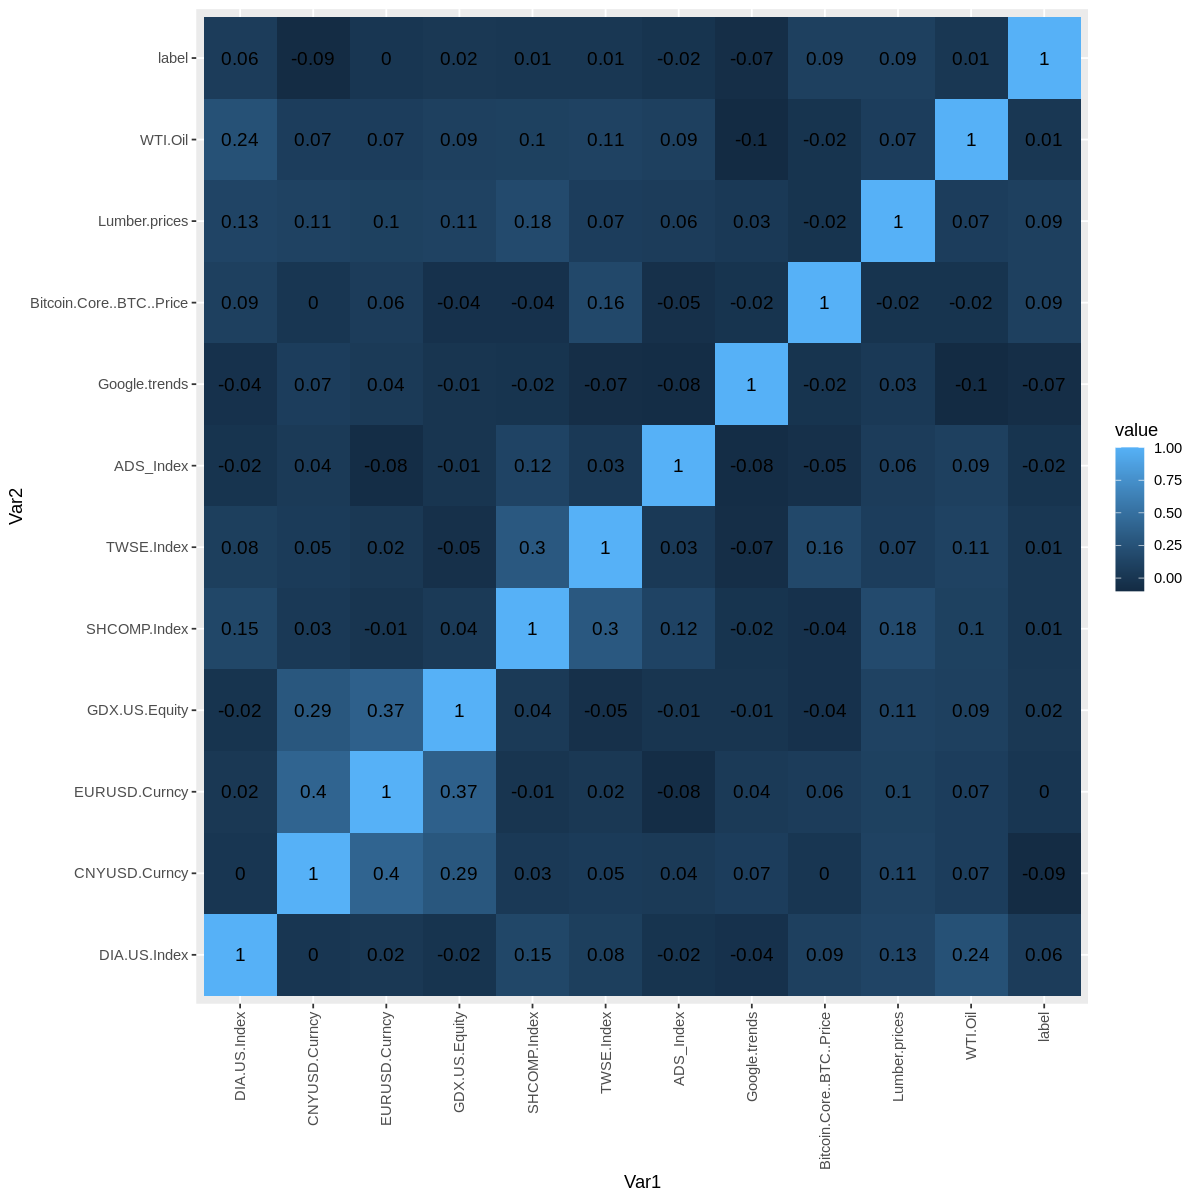

In [55]:
# creating correlation matrix
corr_mat <- round(cor(train_data, method='pearson'),2)
 
# reduce the size of correlation matrix
melted_corr_mat <- melt(corr_mat)
# head(melted_corr_mat)

options(repr.plot.width=10, repr.plot.height=10)
 
# plotting the correlation heatmap
ggplot(data = melted_corr_mat, aes(x=Var1, y=Var2,
                                   fill=value)) +
geom_tile() +
geom_text(aes(Var2, Var1, label = value),
          color = "black", size = 4) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [56]:
df = read.csv("https://raw.githubusercontent.com/DN612/Crypto-Analysis/main/Final.csv")
df$Date = as.Date(df$Date, format="%d-%m-%Y")
#df
# print(nrow(df))
# print(ncol(df))
rownames(df) <- df$Date
drops <- c('Date')
df = df[ , !(names(df) %in% drops)]
head(df)


,Annual.Hash.Growth,Block.Height,Block.Interval,Block.Size,Blockchain.Size,Daily.Blocks,Chain.Value.Density,Daily.Transactions,Difficulty,Fee.Percentage,⋯,VIX.Index,VVIX.Index,SHCOMP.Index,TWSE.Index,SPX.Index,ADS_Index,Google.trends,Sentiment.Score,Lumber.prices,WTI.Oil
,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2015-01-01,2884.59,336865,567,265887,28565224287,152,159365.6,75981,40640955017,0.00118685,⋯,19.20,113.08,3234.678,9307.26,2058.90,-0.213298,50,0.0000,328.2,53.27
2015-01-02,2963.58,337030,525,190803,28596706708,165,158210.2,60342,40640955017,0.00170835,⋯,17.79,112.55,3234.678,9307.26,2058.20,-0.228104,51,0.0000,327.6,52.69
2015-01-03,2988.86,337195,525,275957,28642239694,165,157515.5,83215,40640955017,0.00165245,⋯,17.79,112.55,3234.678,9307.26,2058.20,-0.228104,56,0.0000,327.6,52.69
2015-01-04,2980.75,337357,526,292996,28689705013,162,143938.0,81566,40640955017,0.00131521,⋯,17.79,112.55,3234.678,9307.26,2058.20,-0.228104,69,0.0000,327.6,52.69
2015-01-05,2852.20,337529,498,274680,28736949981,172,134006.9,82941,40640955017,0.00202953,⋯,19.92,121.87,3350.519,9274.11,2020.58,-0.267953,67,0.0000,325.6,50.04
2015-01-06,2735.28,337685,552,362893,28793561346,156,135990.4,95877,40640955017,0.00140204,⋯,21.12,118.45,3351.446,9048.34,2002.61,-0.279667,74,0.2023,317.4,47.93


In [57]:
df_minussent = df[-(ncol(df)-2)]
diff = (lead(df_minussent)-df_minussent)/df_minussent
# print(dim(diff))
#print(colnames(diff))
diff = diff[complete.cases(diff),]
diff$Sentiment.Score = df$Sentiment.Score[-1]
# print(length(df$Sentiment.Score))
print(dim(diff))
diff$label = lead(diff$Bitcoin.Core..BTC..Price)*100
diff = diff[complete.cases(diff$label),]

[1] 1904   51


In [58]:
diff$std_BTC_returns = rollapplyr(diff['Bitcoin.Core..BTC..Price'], 5, sd, fill = 0)*100

In [59]:
head(diff)

,Annual.Hash.Growth,Block.Height,Block.Interval,Block.Size,Blockchain.Size,Daily.Blocks,Chain.Value.Density,Daily.Transactions,Difficulty,Fee.Percentage,⋯,SHCOMP.Index,TWSE.Index,SPX.Index,ADS_Index,Google.trends,Lumber.prices,WTI.Oil,Sentiment.Score,label,std_BTC_returns
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
2015-01-02,0.027383441,0.0004898105,-0.074074074,-0.28239064,0.001102124,0.08552632,-0.007250060,-0.20582777,0,0.43939841,⋯,0.0000000000,0.000000000,-0.0003399874,0.06941462,0.02000000,-0.001828154,-0.01088793,0.0000,-0.3106181,0.000000
2015-01-03,0.008530224,0.0004895707,0.000000000,0.44629277,0.001592246,0.00000000,-0.004390742,0.37905605,0,-0.03272163,⋯,0.0000000000,0.000000000,0.0000000000,0.00000000,0.09803922,0.000000000,0.00000000,0.0000,-8.4954852,0.000000
2015-01-04,-0.002713409,0.0004804342,0.001904762,0.06174513,0.001657179,-0.01818182,-0.086198242,-0.01981614,0,-0.20408484,⋯,0.0000000000,0.000000000,0.0000000000,0.00000000,0.23214286,0.000000000,0.00000000,0.0000,-6.7755386,0.000000
2015-01-05,-0.043126730,0.0005098457,-0.053231939,-0.06251280,0.001646757,0.06172840,-0.068995564,0.01685751,0,0.54312239,⋯,0.0358122199,-0.003561736,-0.0182781071,0.17469663,-0.02898551,-0.006105006,-0.05029417,0.0000,1.6511368,0.000000
2015-01-06,-0.040992918,0.0004621825,0.108433735,0.32114825,0.001969985,-0.09302326,0.014801778,0.15596629,0,-0.30917996,⋯,0.0002766736,-0.024344115,-0.0088934860,0.04371662,0.10447761,-0.025184275,-0.04216627,0.2023,3.8719613,4.439265
2015-01-07,-0.018528268,0.0004678917,-0.010869565,-0.12428181,0.001743831,0.01282051,0.037210565,-0.07166474,0,-0.21938746,⋯,0.0067159071,0.003508931,0.0116298231,0.03907504,-0.27027027,0.016698173,0.01502191,0.0000,3.3675739,5.377294


In [60]:
drops <- c('SPX.Index','VVIX.Index','VIX.Index')
dffull_new = diff[ , !(names(diff) %in% drops)]
head(dffull_new)

,Annual.Hash.Growth,Block.Height,Block.Interval,Block.Size,Blockchain.Size,Daily.Blocks,Chain.Value.Density,Daily.Transactions,Difficulty,Fee.Percentage,⋯,GDX.US.Equity,SHCOMP.Index,TWSE.Index,ADS_Index,Google.trends,Lumber.prices,WTI.Oil,Sentiment.Score,label,std_BTC_returns
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
2015-01-02,0.027383441,0.0004898105,-0.074074074,-0.28239064,0.001102124,0.08552632,-0.007250060,-0.20582777,0,0.43939841,⋯,0.03046790,0.0000000000,0.000000000,0.06941462,0.02000000,-0.001828154,-0.01088793,0.0000,-0.3106181,0.000000
2015-01-03,0.008530224,0.0004895707,0.000000000,0.44629277,0.001592246,0.00000000,-0.004390742,0.37905605,0,-0.03272163,⋯,0.00000000,0.0000000000,0.000000000,0.00000000,0.09803922,0.000000000,0.00000000,0.0000,-8.4954852,0.000000
2015-01-04,-0.002713409,0.0004804342,0.001904762,0.06174513,0.001657179,-0.01818182,-0.086198242,-0.01981614,0,-0.20408484,⋯,0.00000000,0.0000000000,0.000000000,0.00000000,0.23214286,0.000000000,0.00000000,0.0000,-6.7755386,0.000000
2015-01-05,-0.043126730,0.0005098457,-0.053231939,-0.06251280,0.001646757,0.06172840,-0.068995564,0.01685751,0,0.54312239,⋯,0.02639916,0.0358122199,-0.003561736,0.17469663,-0.02898551,-0.006105006,-0.05029417,0.0000,1.6511368,0.000000
2015-01-06,-0.040992918,0.0004621825,0.108433735,0.32114825,0.001969985,-0.09302326,0.014801778,0.15596629,0,-0.30917996,⋯,0.05298354,0.0002766736,-0.024344115,0.04371662,0.10447761,-0.025184275,-0.04216627,0.2023,3.8719613,4.439265
2015-01-07,-0.018528268,0.0004678917,-0.010869565,-0.12428181,0.001743831,0.01282051,0.037210565,-0.07166474,0,-0.21938746,⋯,-0.01856375,0.0067159071,0.003508931,0.03907504,-0.27027027,0.016698173,0.01502191,0.0000,3.3675739,5.377294


In [61]:
drops <- c('Lumber.prices','WTI.Oil','DIA.US.Index','CNYUSD.Curncy','EURUSD.Curncy','GDX.US.Equity','SHCOMP.Index','TWSE.Index','ADS_Index','Google.trends','Annual.Hash.Growth','Block.Height','Block.Interval','Block.Size','Daily.Transactions','Difficulty','Fee.Percentage','Fee.Rate','Two.Week.Hash.Growth','Hash.Rate','Inflation.Rate','Price.Volatility','Bitcoin.Core..BTC..Price','Quarterly.Hash.Growth','Total.Transactions','Transaction.Size','Avg..UTXO.Amount','Velocity...Daily','Velocity...Quarterly','Velocity.of.Money','Sentiment.Score','std_BTC_returns','label')
dffull_new = diff[ , (names(diff) %in% drops)]
head(dffull_new)

,Annual.Hash.Growth,Block.Height,Block.Interval,Block.Size,Daily.Transactions,Difficulty,Fee.Percentage,Fee.Rate,Two.Week.Hash.Growth,Hash.Rate,⋯,GDX.US.Equity,SHCOMP.Index,TWSE.Index,ADS_Index,Google.trends,Lumber.prices,WTI.Oil,Sentiment.Score,label,std_BTC_returns
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
2015-01-02,0.027383441,0.0004898105,-0.074074074,-0.28239064,-0.20582777,0,0.43939841,-0.07142857,0.32470218,0.010752397,⋯,0.03046790,0.0000000000,0.000000000,0.06941462,0.02000000,-0.001828154,-0.01088793,0.0000,-0.3106181,0.000000
2015-01-03,0.008530224,0.0004895707,0.000000000,0.44629277,0.37905605,0,-0.03272163,0.03846154,0.17293335,0.015980108,⋯,0.00000000,0.0000000000,0.000000000,0.00000000,0.09803922,0.000000000,0.00000000,0.0000,-8.4954852,0.000000
2015-01-04,-0.002713409,0.0004804342,0.001904762,0.06174513,-0.01981614,0,-0.20408484,-0.07407407,0.18898276,0.013020884,⋯,0.00000000,0.0000000000,0.000000000,0.00000000,0.23214286,0.000000000,0.00000000,0.0000,-6.7755386,0.000000
2015-01-05,-0.043126730,0.0005098457,-0.053231939,-0.06251280,0.01685751,0,0.54312239,0.84000000,0.10973817,0.007057378,⋯,0.02639916,0.0358122199,-0.003561736,0.17469663,-0.02898551,-0.006105006,-0.05029417,0.0000,1.6511368,0.000000
2015-01-06,-0.040992918,0.0004621825,0.108433735,0.32114825,0.15596629,0,-0.30917996,-0.39130435,-0.13194374,-0.002853458,⋯,0.05298354,0.0002766736,-0.024344115,0.04371662,0.10447761,-0.025184275,-0.04216627,0.2023,3.8719613,4.439265
2015-01-07,-0.018528268,0.0004678917,-0.010869565,-0.12428181,-0.07166474,0,-0.21938746,-0.07142857,-0.01508523,0.002661934,⋯,-0.01856375,0.0067159071,0.003508931,0.03907504,-0.27027027,0.016698173,0.01502191,0.0000,3.3675739,5.377294


In [62]:
write.csv(dffull_new,'FullDataset.csv')

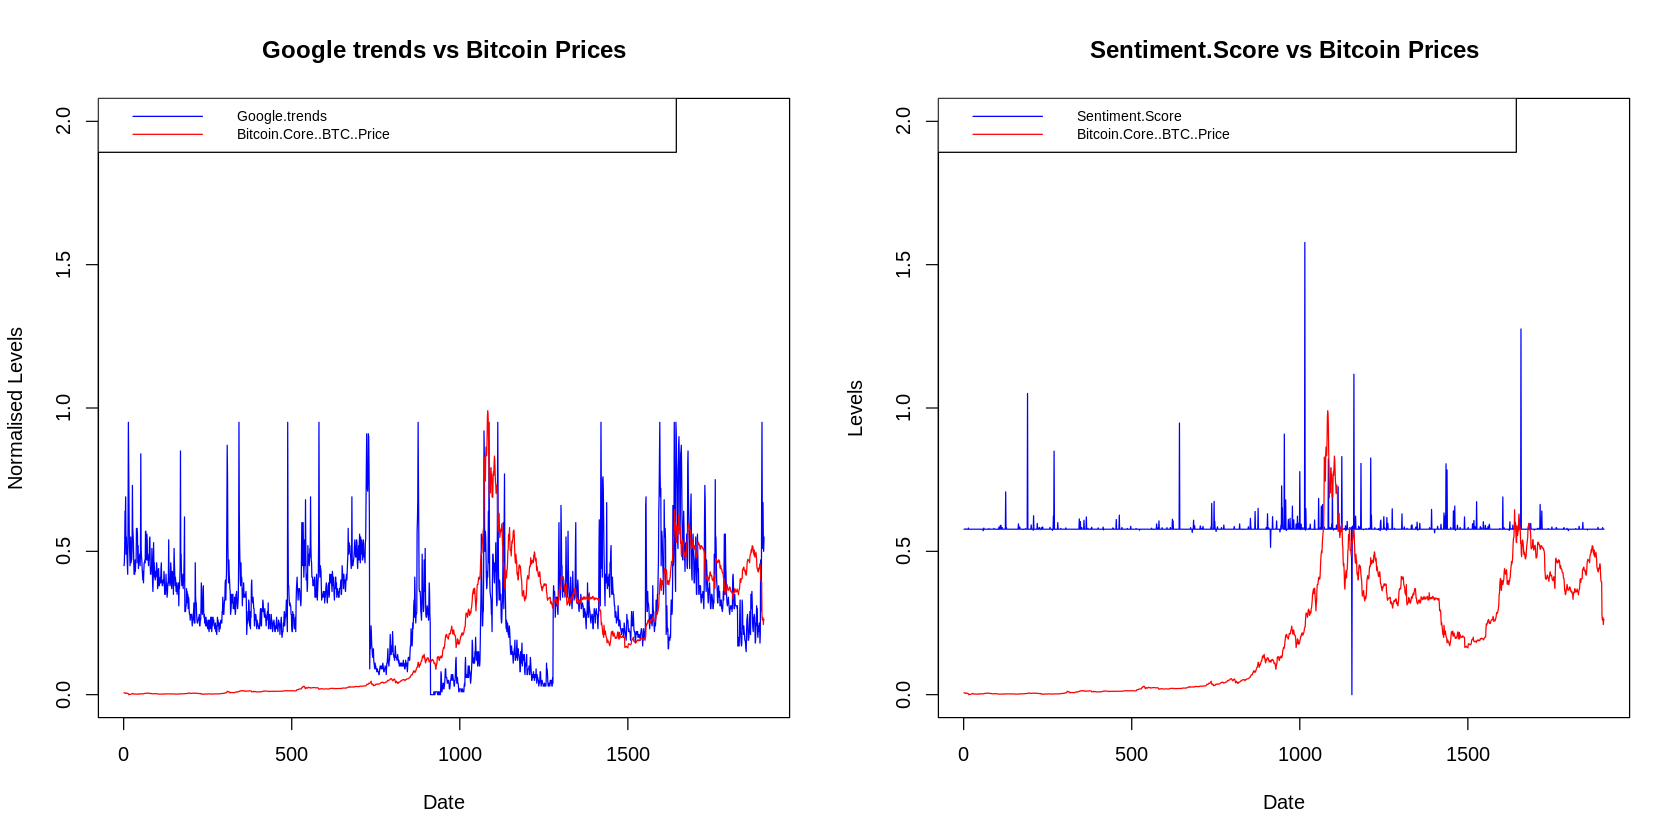

In [63]:

options(repr.plot.width=14, repr.plot.height=7)
options(repr.width=40)
par(mfrow=c(1,2))
plot((df['Google.trends'][,1]-min(df['Google.trends'][,1]))/max(df['Google.trends'][,1]), type='l', main='Google trends vs Bitcoin Prices',xlab='Date',ylab='Normalised Levels',col='blue',ylim=c(0,2))
lines((df['Bitcoin.Core..BTC..Price'][,1]-min(df['Bitcoin.Core..BTC..Price'][,1]))/max(df['Bitcoin.Core..BTC..Price'][,1]) , col = "red")
legend('topleft', legend=c('Google.trends', "Bitcoin.Core..BTC..Price"),
col=c("blue", "red"), lty=1:1, cex=0.7)

options(repr.width=40)
# par(mfrow=c(3,5))
plot((df['Sentiment.Score'][,1]-min(df['Sentiment.Score'][,1]))/max(df['Sentiment.Score'][,1]), type='l', main='Sentiment.Score vs Bitcoin Prices',xlab='Date',ylab='Levels',col='blue',ylim=c(0,2))
lines((df['Bitcoin.Core..BTC..Price'][,1]-min(df['Bitcoin.Core..BTC..Price'][,1]))/max(df['Bitcoin.Core..BTC..Price'][,1]) , col = "red")
legend('topleft', legend=c('Sentiment.Score', "Bitcoin.Core..BTC..Price"),
col=c("blue", "red"), lty=1:1, cex=0.7)



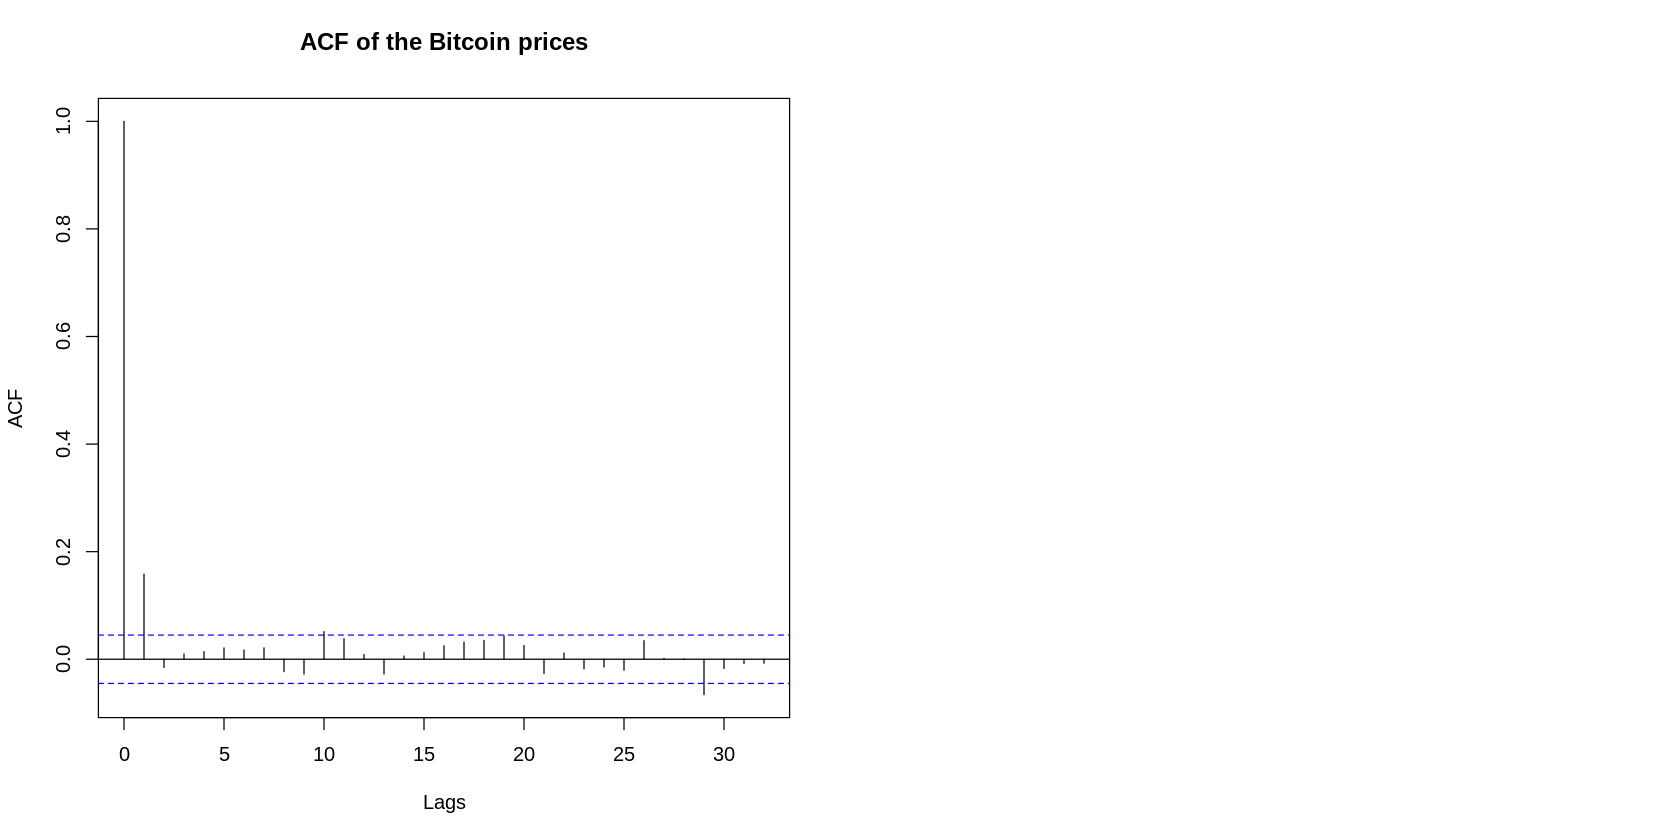

In [64]:
#acf plot
options(repr.plot.width=14, repr.plot.height=7)
options(repr.width=40)
par(mfrow=c(1,2))
acf(diff['label'],main='ACF of the Bitcoin prices', xlab='Lags')

## Baseline Model

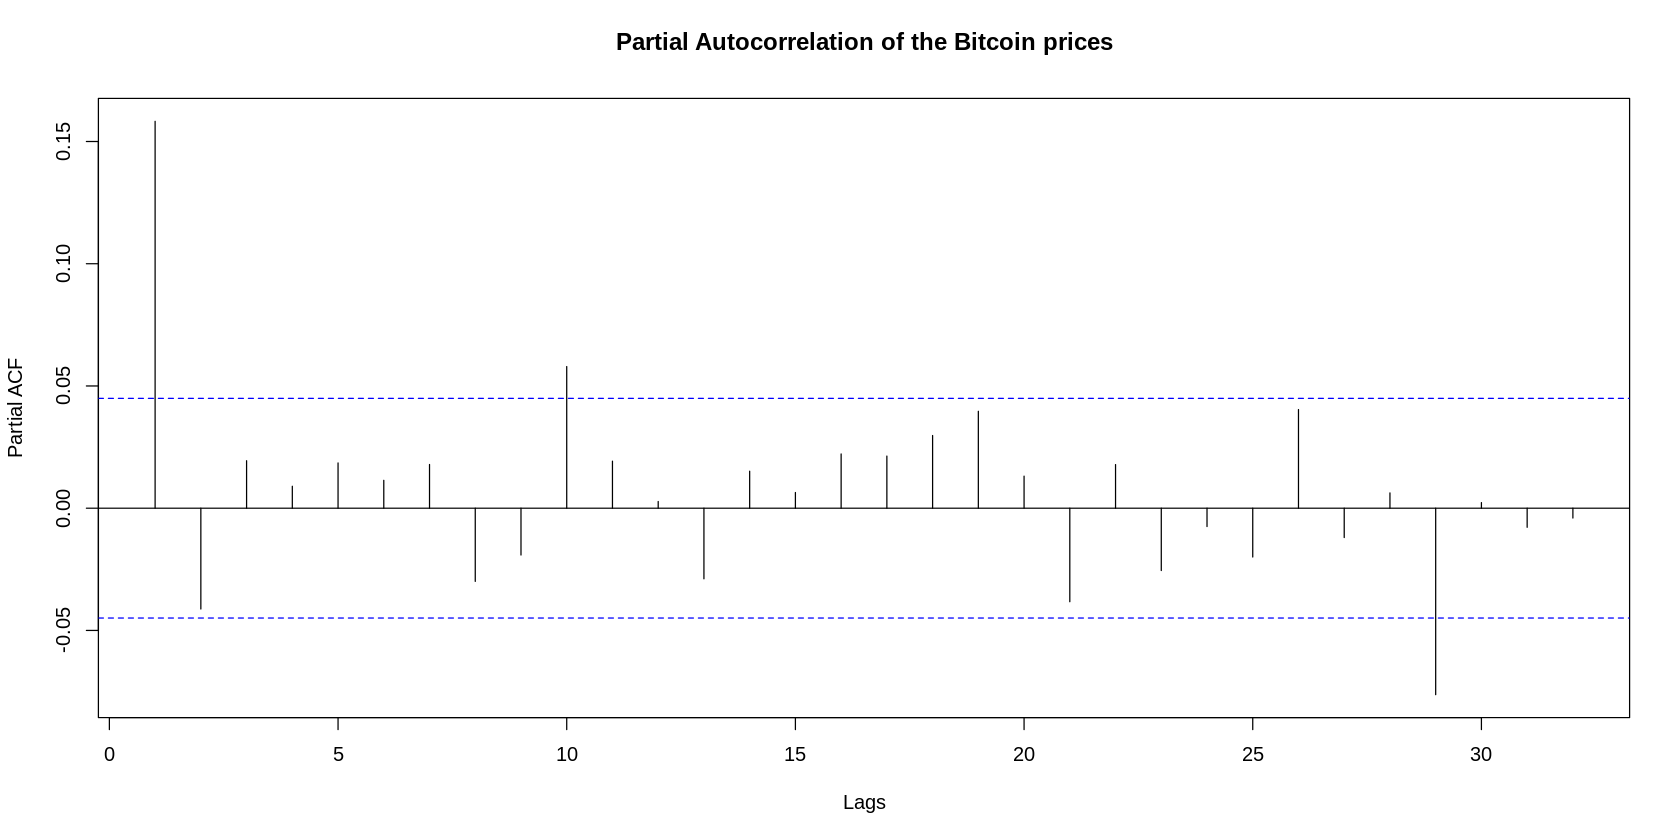

In [106]:

pacf(diff['label'],main='Partial Autocorrelation of the Bitcoin prices', xlab='Lags')

In [105]:
library(forecast)
fitCrypto = auto.arima(diff['label'])
fitCrypto

Series: diff["label"] 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1    mean
      0.1684  0.2081
s.e.  0.0230  0.0907

sigma^2 = 11.48:  log likelihood = -5021.11
AIC=10048.23   AICc=10048.24   BIC=10064.88

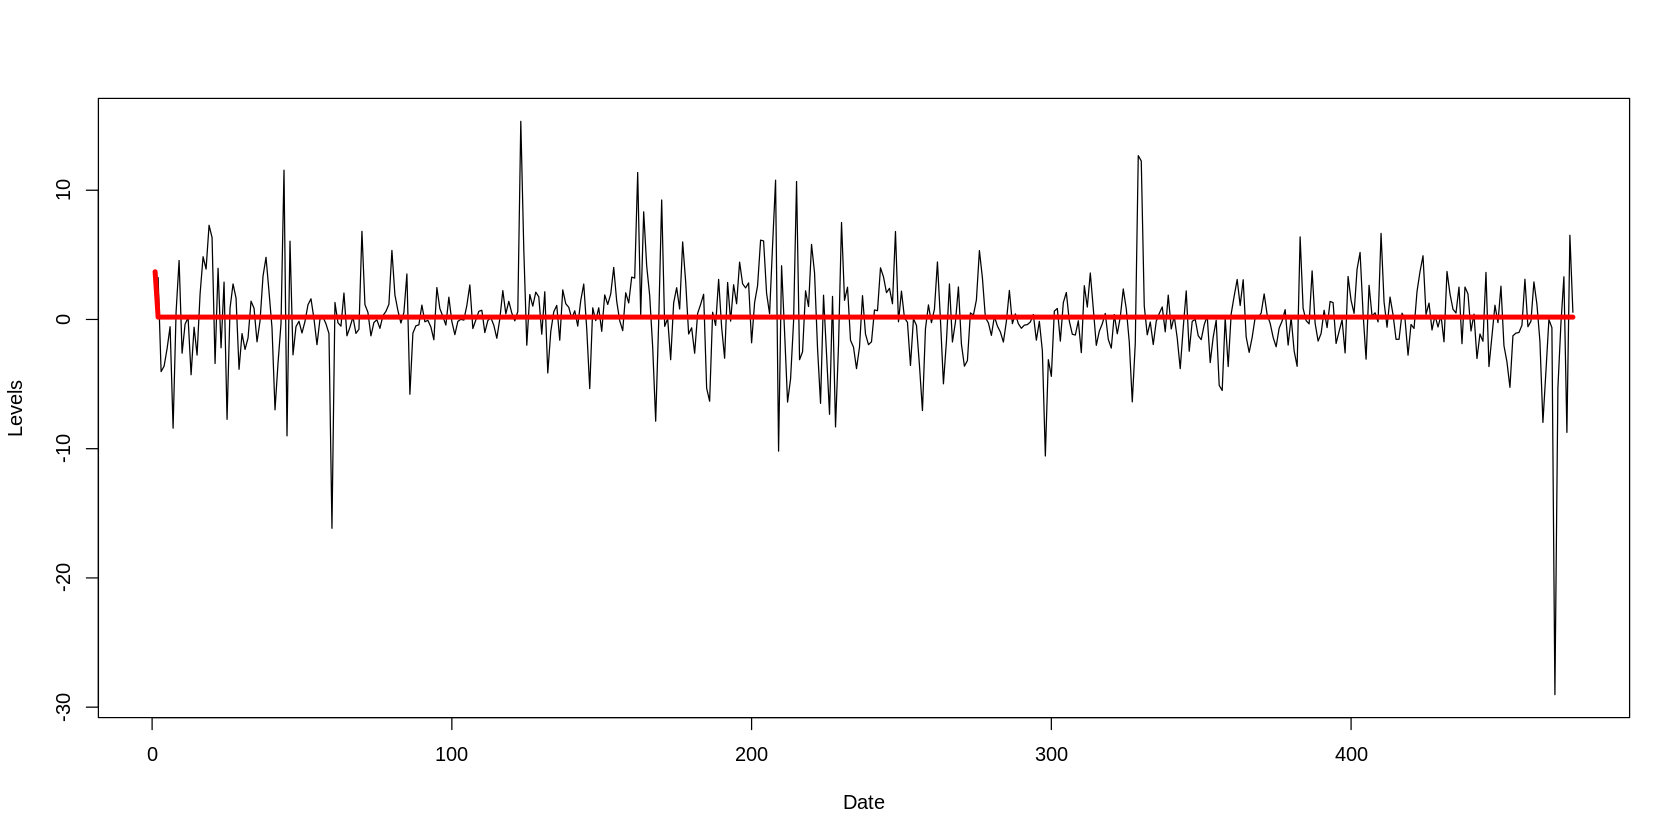

In [101]:
#install.packages('rugarch')
library(rugarch)
garch.model.t = ugarchspec(mean.model = list(armaOrder=c(0,1)),
variance.model=list(garchOrder=c(1,1)),
distribution.model="std")
#Train and test split
r=floor(0.75*nrow(diff))
garchFit = ugarchfit(data=diff[1:r,'label'],spec=garch.model.t)
predGARCH = ugarchforecast(garchFit, n.ahead = 474)
### Predictions start at end of series
plot(diff[(nrow(diff)-473):nrow(diff),'label'],type="l",xlab='Date',ylab='Levels')
lines(fitted(predGARCH),col="red",lwd=4)



In [99]:
# install.packages('Metrics')
library(Metrics)

rmse(diff[(nrow(diff)-473):nrow(diff),'label'], fitted(predGARCH))



[1] 3.478373